In [2]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install xgboost
!pip install holidays
!pip install datetime
!pip install statsmodels

--------------------------------------------------------------------------------
# 1. Problem Statement

Before diving into the code, it is important to outline the goal of this notebook. The objective is to clean and preprocess the 2013 flight dataset, handle missing data, and prepare it for further analysis and modeling. Specifically, we will:

- Identify and handle missing values.

- Remove duplicate rows.

- Validate data integrity (e.g., check for invalid values).

- Impute missing values using appropriate techniques.

- Create new features (e.g., flight_status) to categorize flights.

# 2. Loading the Dataset & Checking for Missing Values

The first step is to load the dataset into a Pandas DataFrame. This allows us to perform exploratory data analysis (EDA) and data cleaning operations.

Missing data can significantly impact the quality of analysis and modeling. Here, we calculate the number and percentage of missing values in each column to identify which columns require attention.

In [3]:
from sklearn.impute import KNNImputer
import pandas as pd
df = pd.read_csv("flights.csv")

import pandas as pd

# Assuming your dataset is stored in a DataFrame called df
# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Display results
print("Missing Values:\n", missing_values)
print("\nMissing Values (%):\n", missing_percentage)

Missing Values:
 id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

Missing Values (%):
 id                0.000000
year              0.000000
month             0.000000
day               0.000000
dep_time          2.451184
sched_dep_time    0.000000
dep_delay         2.451184
arr_time          2.587180
sched_arr_time    0.000000
arr_delay         2.800081
carrier           0.000000
flight            0.000000
tailnum           0.745896
origin            0.000000
dest              0.000000
air_time          2.800081
distance          0.000000
hour  

# 3. Checking for Duplicate Rows
Duplicate rows can skew analysis and modeling results. Here, we check for and remove any duplicate rows in the dataset.

In [4]:
# Check for duplicate rows
duplicates = df.duplicated().sum()

# Display results
print("Number of duplicate rows:", duplicates)

# Drop duplicates (if needed)
df = df.drop_duplicates()

Number of duplicate rows: 0


# 4. Validating Data Integrity

To ensure the dataset is clean, we check for invalid or unexpected values in categorical and numerical columns. For example:

Are there negative values in dep_time or distance?

Are there unexpected categories in tailnum or carrier?

In [5]:
# Check for unique values in categorical columns
print("Unique values in 'tailnum':", df['tailnum'].unique())
print("Unique values in 'carrier':", df['carrier'].unique())

# Check for invalid values in numerical columns
print("Invalid 'dep_time' values:", df[df['dep_time'] < 0]['dep_time'].unique())
print("Invalid 'distance' values:", df[df['distance'] < 0]['distance'].unique())

Unique values in 'tailnum': ['N14228' 'N24211' 'N619AA' ... 'N776SK' 'N785SK' 'N557AS']
Unique values in 'carrier': ['UA' 'AA' 'B6' 'DL' 'EV' 'MQ' 'US' 'WN' 'VX' 'FL' 'AS' '9E' 'F9' 'HA'
 'YV' 'OO']
Invalid 'dep_time' values: []
Invalid 'distance' values: []


# 5. Identifying Rows with Multiple Missing Attributes

Some rows may have multiple missing attributes, which could indicate data quality issues. Here, we identify and inspect these rows.

In [6]:
import pandas as pd

# Count the number of missing values per row
df['missing_count'] = df.isnull().sum(axis=1)

# Filter rows with multiple missing attributes (e.g., 2 or more)
rows_with_multiple_missing = df[df['missing_count'] >= 2]

# Print these rows
print("Rows with multiple missing attributes:")
print(rows_with_multiple_missing)

Rows with multiple missing attributes:
            id  year  month  day  dep_time  sched_dep_time  dep_delay  \
471        471  2013      1    1    1525.0            1530       -5.0   
477        477  2013      1    1    1528.0            1459       29.0   
615        615  2013      1    1    1740.0            1745       -5.0   
643        643  2013      1    1    1807.0            1738       29.0   
725        725  2013      1    1    1939.0            1840       59.0   
...        ...   ...    ...  ...       ...             ...        ...   
336771  336771  2013      9   30       NaN            1455        NaN   
336772  336772  2013      9   30       NaN            2200        NaN   
336773  336773  2013      9   30       NaN            1210        NaN   
336774  336774  2013      9   30       NaN            1159        NaN   
336775  336775  2013      9   30       NaN             840        NaN   

        arr_time  sched_arr_time  arr_delay  ... tailnum  origin dest  \
471       1

# 6. Creating the flight_status Column

To better understand flight outcomes, we categorize flights into three statuses:

Completed: Flights with both departure and arrival times recorded.

Incomplete: Flights with a departure time but no arrival time.

Cancelled: Flights with no departure time.

In [7]:
import pandas as pd
import numpy as np

# Create the 'flight_status' column
df['flight_status'] = np.where(
    df['dep_time'].isnull(), 'cancelled',  # If dep_time is NaN, flight is cancelled
    np.where(
        df['arr_time'].isnull(), 'incomplete',  # If arr_time is NaN, flight is incomplete
        'completed'  # Otherwise, flight is completed
    )
)

# Check the distribution of flight_status
print(df['flight_status'].value_counts())


flight_status
completed     328063
cancelled       8255
incomplete       458
Name: count, dtype: int64


# 7. Creating the flight_status Column

To better understand flight outcomes, we categorize flights into three statuses:

Completed: Flights with both departure and arrival times recorded.

Incomplete: Flights with a departure time but no arrival time.

Cancelled: Flights with no departure time.

In [8]:
# Fill missing tailnum with 'private'
df['tailnum'].fillna('private', inplace=True)

# Check the distribution of tailnum
print(df['tailnum'].value_counts())

tailnum
private    2512
N725MQ      575
N722MQ      513
N723MQ      507
N711MQ      486
           ... 
N7ASAA        1
N932DN        1
N318AS        1
N651UA        1
N557AS        1
Name: count, Length: 4044, dtype: int64


C:\Users\Eric\AppData\Local\Temp\ipykernel_15344\373628596.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tailnum'].fillna('private', inplace=True)


# 8. Cleaning and Imputing Numerical Columns
For numerical columns like dep_delay, arr_delay, and air_time, we:

Replace non-standard missing values (e.g., -999, 'NA') with NaN.

Convert columns to numeric types.

Fill missing values in completed flights with 0.

Use a KNN Imputer to estimate missing air_time values based on related features.

In [9]:
import pandas as pd
import numpy as np

# Create a deep copy of the DataFrame
df_cleaned = df.copy(deep=True)

# Replace non-standard missing values with np.nan
df_cleaned.replace([-999, 'NA', ''], np.nan, inplace=True)

# Define numerical columns
numerical_columns = ['dep_delay', 'arr_delay', 'air_time', 'dep_time', 'arr_time']

# Convert these columns to numeric (in case they are read as strings)
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing tailnum values with 'private'
df_cleaned['tailnum'] = df_cleaned['tailnum'].fillna('private')

# Replace NaNs with 0 in numerical columns for flights marked as 'completed'
for col in numerical_columns:
    df_cleaned.loc[df_cleaned['flight_status'] == 'completed', col] = (
        df_cleaned.loc[df_cleaned['flight_status'] == 'completed', col].fillna(0)
    )

# Additionally, fill remaining NaNs in all numerical columns across all flight statuses with 0
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].fillna(0)

# Debug: Print any rows that still have missing values
missing_rows = df_cleaned[df_cleaned.isnull().any(axis=1)]
if not missing_rows.empty:
    print("Rows with remaining missing values:")
    print(missing_rows)
else:
    print("No remaining missing values in the dataset.")

# Verify that NaNs are replaced for numerical columns
print("\nMissing values after replacement:")
print(df_cleaned[numerical_columns].isnull().sum())

# Check the distribution of numerical columns after replacement
print("\nNumerical Columns after replacement:")
print(df_cleaned[numerical_columns].describe())


No remaining missing values in the dataset.

Missing values after replacement:
dep_delay    0
arr_delay    0
air_time     0
dep_time     0
arr_time     0
dtype: int64

Numerical Columns after replacement:
           dep_delay      arr_delay       air_time       dep_time  \
count  336776.000000  336776.000000  336776.000000  336776.000000   
mean       12.329263       6.702301     146.467118    1316.040778   
std        39.762251      44.018670      95.654155     525.447907   
min       -43.000000     -86.000000       0.000000       0.000000   
25%        -5.000000     -16.000000      78.000000     854.000000   
50%        -1.000000      -4.000000     126.000000    1349.000000   
75%        10.000000      13.000000     188.000000    1737.000000   
max      1301.000000    1272.000000     695.000000    2400.000000   

            arr_time  
count  336776.000000  
mean     1463.194138  
std       577.818818  
min         0.000000  
25%      1047.000000  
50%      1518.000000  
75%      193

# 9. Calculate Air Time for Zero Values

For any zero values of air_time (where air_time was originally NaN), attempt to calculate the air time using the formula `arrival time - departure time`.

Only apply this change if there are arrival times and departure times that can be used (non-zero values).

Finally, if some rows have larger depature times than the arrival time, ensure there are no negative values.

In [10]:
# Filter rows where flight_status is 'completed'
completed_flights = df_cleaned[df_cleaned['flight_status'] == 'completed']

# Count the number of rows where air_time is 0
zero_air_time_count = completed_flights[completed_flights['air_time'] == 0].shape[0]

# Print the result
print(f"Number of 'completed' flights with air_time = 0: {zero_air_time_count}")

Number of 'completed' flights with air_time = 0: 717


# 10. Impute Air Time for Remaining Zero Values

Any remaining zero values for air time resulted from the departure time being larger than the arrival time.

For these values, we must impute them using a KNN Imputer.

In [11]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Prepare the data
# Filter only completed flights
completed_flights = df_cleaned[df_cleaned['flight_status'] == 'completed']

# Separate rows where air_time = 0 (to be imputed) and air_time > 0 (to train the model)
flights_to_impute = completed_flights[completed_flights['air_time'] == 0]
flights_with_air_time = completed_flights[completed_flights['air_time'] > 0]

# Step 2: Select features for KNN
# Choose relevant features (e.g., distance, dep_time, arr_time, dep_delay, arr_delay)
features = ['distance', 'dep_time', 'arr_time', 'dep_delay', 'arr_delay']

# Extract the feature matrix for training and imputation
X_train = flights_with_air_time[features]  # Features for training
y_train = flights_with_air_time['air_time']  # Target for training
X_impute = flights_to_impute[features]  # Features for imputation

# Step 3: Standardize the features (KNN is sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_impute_scaled = scaler.transform(X_impute)

# Step 4: Train the KNN model and impute air_time
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the training data (only X_train_scaled)
imputer.fit(X_train_scaled)

# Impute air_time for rows with air_time = 0
imputed_data = imputer.transform(X_impute_scaled)

# The imputed_data will have the same number of features as X_train_scaled (5 features)
# Since we are imputing air_time, we need to map the imputed values back to the original dataset

# Step 5: Update the dataset
# Replace air_time = 0 with the imputed values
df_cleaned.loc[flights_to_impute.index, 'air_time'] = imputed_data[:, -1]  # Use the last column as the imputed air_time

# Ensure air_time is not less than 0
df_cleaned = df_cleaned[(df_cleaned['air_time'] > 0)]

# Verify that air_time = 0 has been replaced
print("\nNumber of 'completed' flights with air_time = 0 after imputation:",
      df_cleaned[(df_cleaned['flight_status'] == 'completed') & (df_cleaned['air_time'] == 0)].shape[0])


Number of 'completed' flights with air_time = 0 after imputation: 0


In [12]:
print(df_cleaned[df_cleaned['flight_status'] == 'completed']['air_time'].describe())

count    327346.000000
mean        150.686460
std          93.688305
min          20.000000
25%          82.000000
50%         129.000000
75%         192.000000
max         695.000000
Name: air_time, dtype: float64


# 11. Finalizing the Dataset
After cleaning and imputing, we combine all flight statuses (completed, incomplete, cancelled) into a single dataset. We also create a new feature, total_delay, which sums dep_delay and arr_delay.

In [13]:
import os

# Step 1: Verify the final dataset
print("\nFinal Dataset Shape:", df_cleaned.shape)
print("\nFlight Status Distribution in Final Dataset:")
print(df_cleaned['flight_status'].value_counts())

# Step 2: Add total delay time, and delay status
df_cleaned['total_delay'] = df_cleaned['dep_delay'] + df_cleaned['arr_delay']

# Step 3: Check for missing values in the final dataset
print("\nMissing values in the final dataset:")
print(df_cleaned.isnull().sum())

# Step 4: Save the final dataset to a CSV file only if it does not already exist
file_path = 'flights_EDA.csv'
if not os.path.exists(file_path):
    df_cleaned.to_csv(file_path, index=False)
    print("\nThe dataset has been saved as 'flights_EDA.csv'.")
else:
    print("\nThe file 'flights_EDA.csv' already exists. No new file was created.")


Final Dataset Shape: (327346, 23)

Flight Status Distribution in Final Dataset:
flight_status
completed    327346
Name: count, dtype: int64

Missing values in the final dataset:
id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
missing_count     0
flight_status     0
total_delay       0
dtype: int64

The file 'flights_EDA.csv' already exists. No new file was created.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('flights_EDA.csv')

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

print("Dataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

print("\nFlight Status Distribution:")
print(df['flight_status'].value_counts())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327346 entries, 0 to 327345
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 327346 non-null  int64  
 1   year               327346 non-null  int64  
 2   month              327346 non-null  int64  
 3   day                327346 non-null  int64  
 4   dep_time           327346 non-null  float64
 5   sched_dep_time     327346 non-null  int64  
 6   dep_delay          327346 non-null  float64
 7   arr_time           327346 non-null  float64
 8   sched_arr_time     327346 non-null  int64  
 9   arr_delay          327346 non-null  float64
 10  carrier            327346 non-null  object 
 11  flight             327346 non-null  int64  
 12  tailnum            327346 non-null  object 
 13  origin             327346 non-null  object 
 14  dest               327346 non-null  object 
 15  air_time           327346 non-nul

<Figure size 1200x600 with 0 Axes>

In [15]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                   0
year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time             0
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time             0
distance             0
hour                 0
minute               0
time_hour            0
name                 0
missing_count        0
flight_status        0
total_delay          0
date                 0
is_holiday           0
season               0
dep_time_category    0
arr_time_category    0
dtype: int64


# 12. Summary

The cleaned dataset is now ready for further analysis and modeling. Key steps included:

- Handling missing values.

- Removing duplicates.

- Validating data integrity.

- Imputing missing air_time values.

- Creating new features like flight_status and total_delay.

- The cleaned dataset is saved as `flights_EDA.csv`.

We will now move onto `EDA_Analysis.ipynb` to continue with our exploratory data analysis on the clean data, check for outliers, trends, and patterns in the data. Thank you.


# Exploratory Data Analysis

The objective of EDA is to analyze patterns and trends on what contributes to delayed flights such as whether winter effects effects delays which can be analyzed with month, air congestion which which can be analyzed departure time of the flight, etc. We aim to investigate factors such as seasonal effects (e.g., winter weather), air congestion (e.g., departure time), and carrier performance. This analysis will help us identify key drivers of delays and prepare the data for further modeling.

--------------------------------------------------------------------------------
# Understanding the Data

We can plot each of the features distributions to better understand the data.

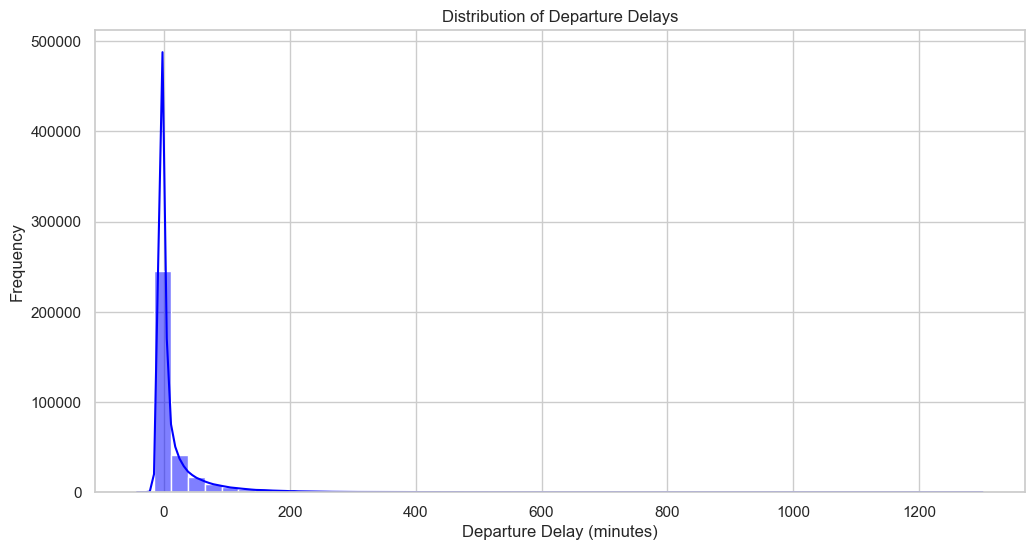

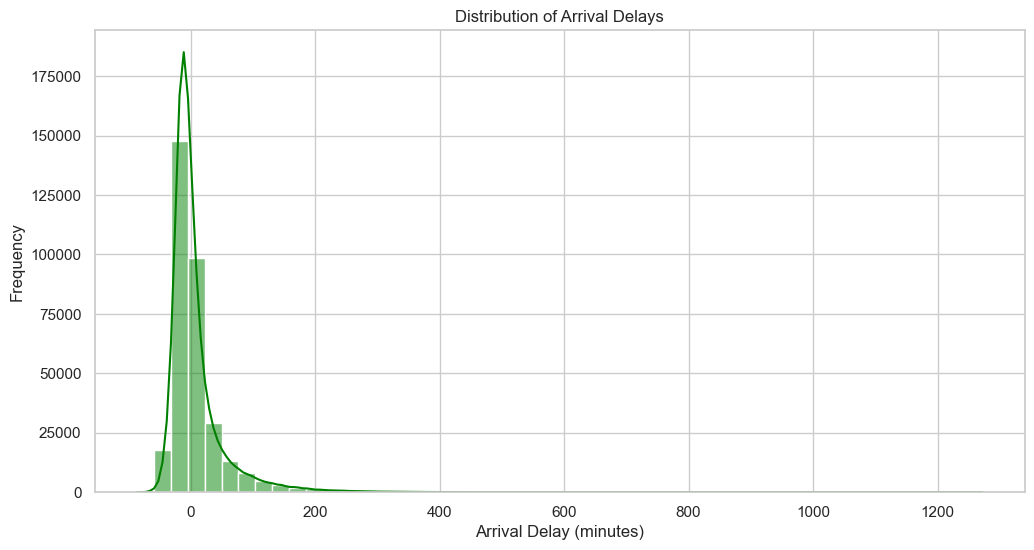

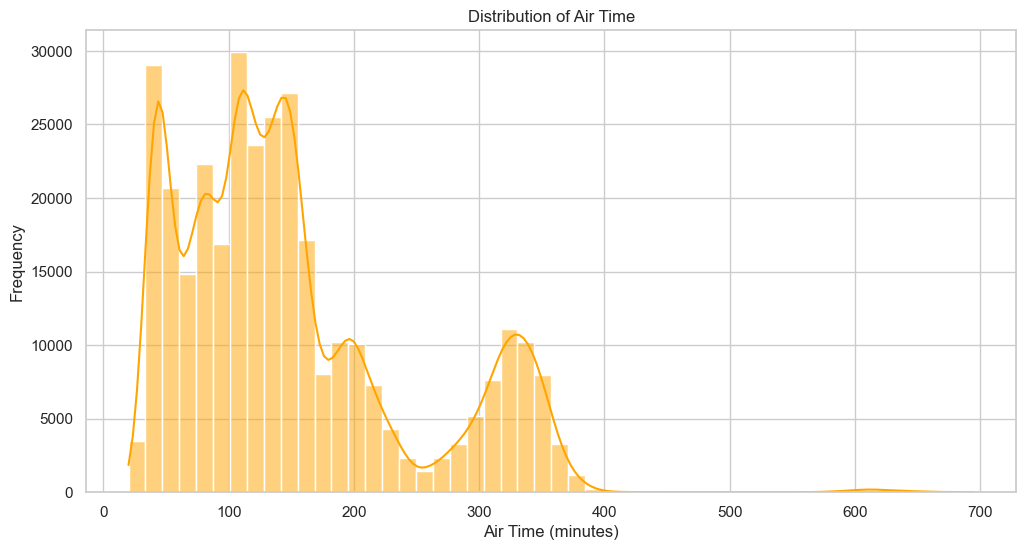

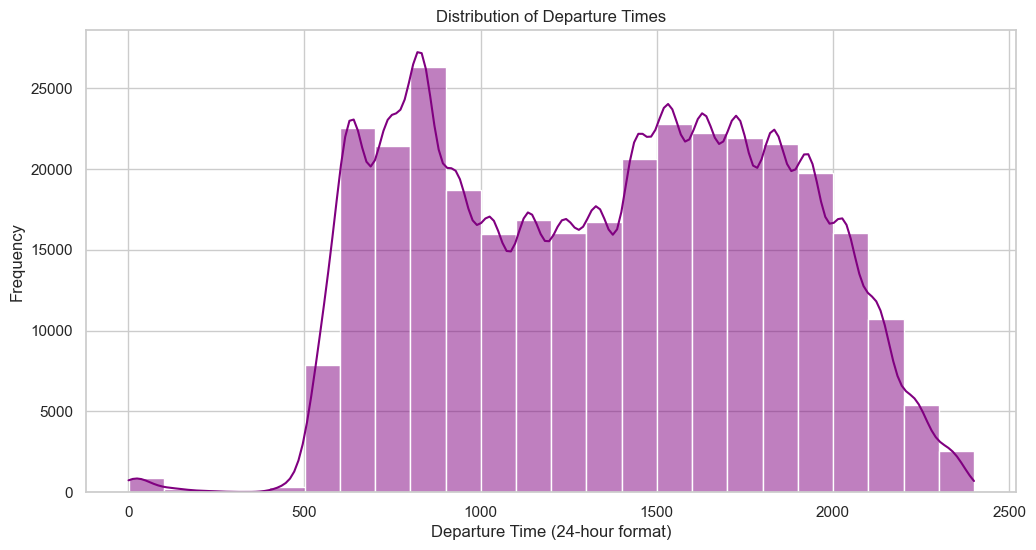

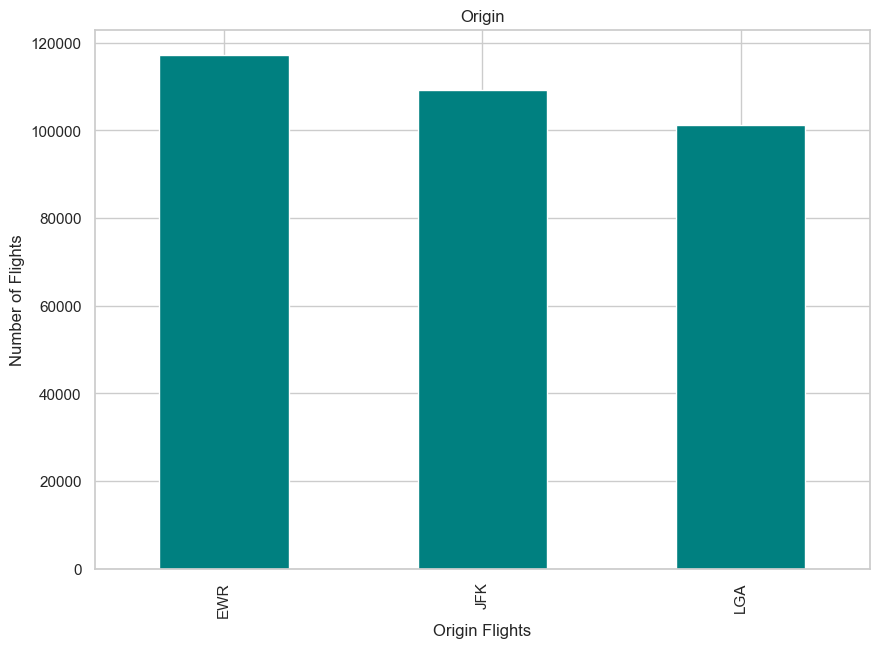

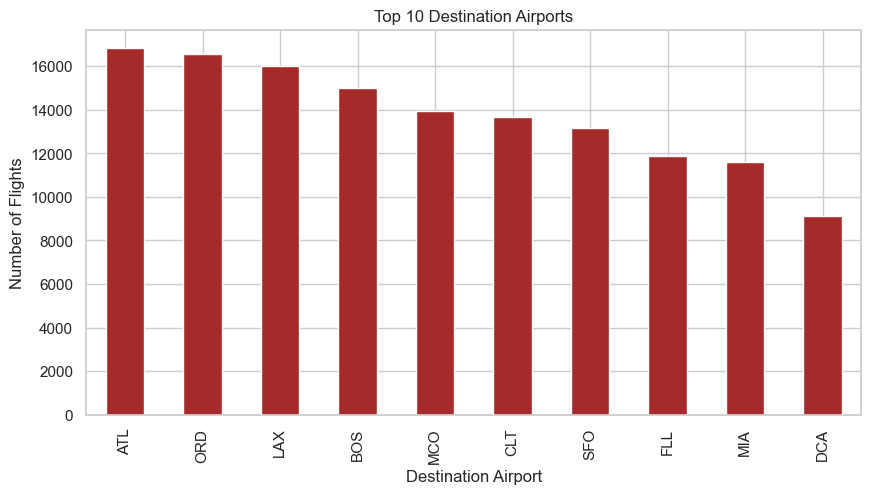

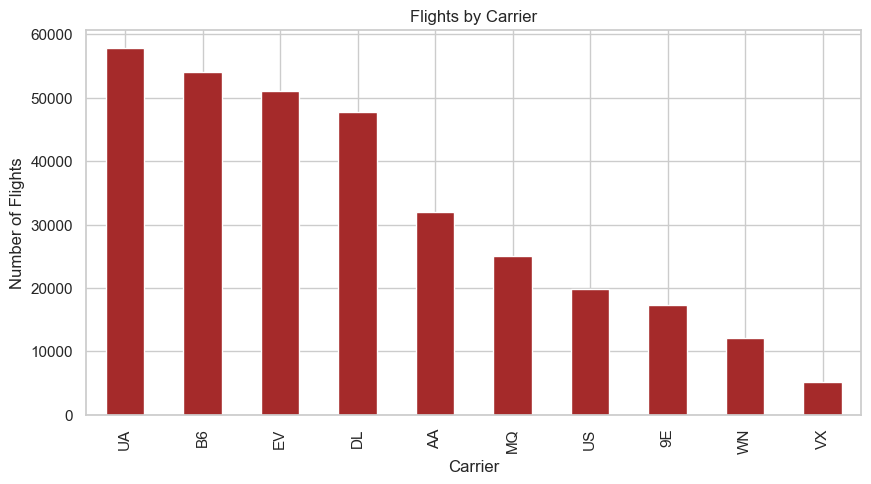

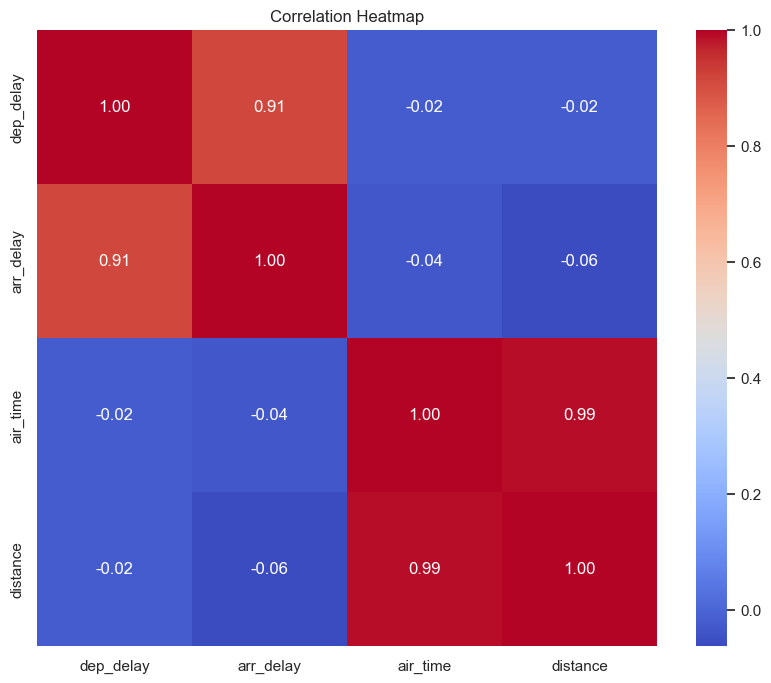

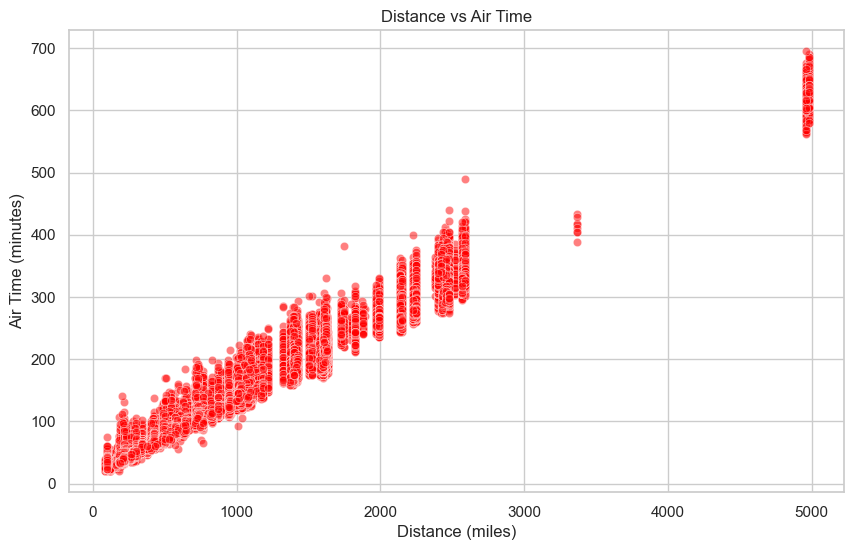

In [16]:
# function to plot count plots
def countPlot(df, fig_x, fig_y, x_plot, title, xlabel, ylabel):
  plt.figure(figsize=(fig_x, fig_y))
  sns.countplot(x=x_plot, data=df, palette='viridis')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

# function to create a histogram
def histogramPlot(df, num_bins, fig_x, fig_y, x_plot, title, xlabel, ylabel, plotcolor):
  plt.figure(figsize=(fig_x, fig_y))
  sns.histplot(df[x_plot], bins=num_bins, kde=True, color=plotcolor)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

# function to create a bargraph
def bargraphPlot(df, num_bars, fig_x, fig_y, x_plot, title, xlabel, ylabel, plotcolor):
  plt.figure(figsize=(fig_x, fig_y))
  df[x_plot].value_counts().head(num_bars).plot(kind='bar', color=plotcolor)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

def scatterPlot(df, fig_x, fig_y, x_plot, y_plot, title, xlabel, ylabel, plotcolor):
  plt.figure(figsize=(fig_x, fig_y))
  sns.scatterplot(x=x_plot, y=y_plot, data=df, alpha=0.5, color='red')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

histogramPlot(df, 50, 12, 6, 'dep_delay', 'Distribution of Departure Delays', 'Departure Delay (minutes)', 'Frequency', 'Blue') # the distribution of departure delayed flights on a histogram
histogramPlot(df, 50, 12, 6, 'arr_delay', 'Distribution of Arrival Delays', 'Arrival Delay (minutes)', 'Frequency', 'Green') # the distribution of arrival delay flights on a histogram
histogramPlot(df, 50, 12, 6, 'air_time', 'Distribution of Air Time', 'Air Time (minutes)', 'Frequency', 'Orange') # the distribution of air times on a histogram
histogramPlot(df, 24, 12, 6, 'dep_time', 'Distribution of Departure Times', 'Departure Time (24-hour format)', 'Frequency', 'Purple') # the distribution of departure times on a histogram
bargraphPlot(df, 10, 10, 7, 'origin', 'Origin', 'Origin Flights', 'Number of Flights', 'Teal') # the distribution of departure times on a histogram
bargraphPlot(df, 10, 10, 5, 'dest', 'Top 10 Destination Airports', 'Destination Airport', 'Number of Flights', 'Brown') # the distribution of departure times on a histogram
bargraphPlot(df, 10, 10, 5, 'carrier', 'Flights by Carrier', 'Carrier', 'Number of Flights', 'Brown') # carrier number of flights

# correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[['dep_delay', 'arr_delay', 'air_time', 'distance']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# scatter plot distance vs air time
scatterPlot(df, 10, 6, 'distance', 'air_time', 'Distance vs Air Time', 'Distance (miles)', 'Air Time (minutes)', 'Red')

# Findings:

Linear postive correlation between Air Time and Distance
Dataset imbalance between each flight and carrier


--------------------------------------------------------------------------------
# Month and Delays

The month might affect flight delays. To determine whether the month affects delays we can plot them using a bar graph and only include delayed flights.

C:\Users\Eric\AppData\Local\Temp\ipykernel_15344\726702339.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_plot, data=df, palette='viridis')


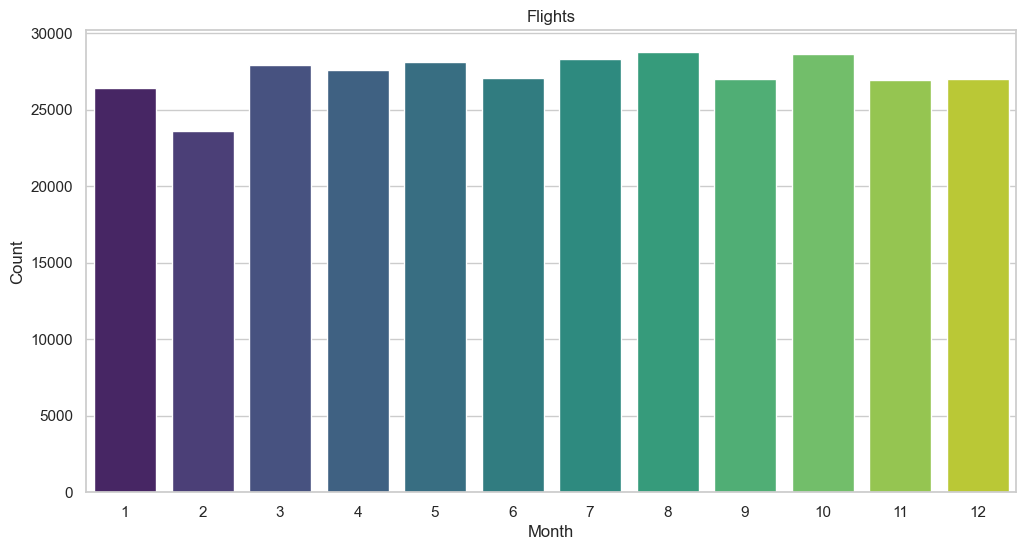

C:\Users\Eric\AppData\Local\Temp\ipykernel_15344\726702339.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_plot, data=df, palette='viridis')


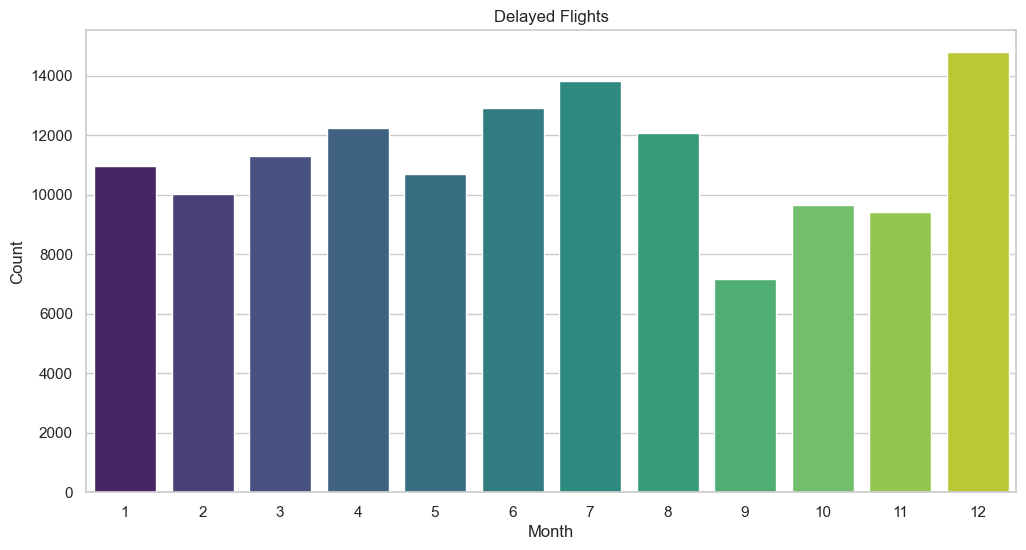

C:\Users\Eric\AppData\Local\Temp\ipykernel_15344\726702339.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_plot, data=df, palette='viridis')


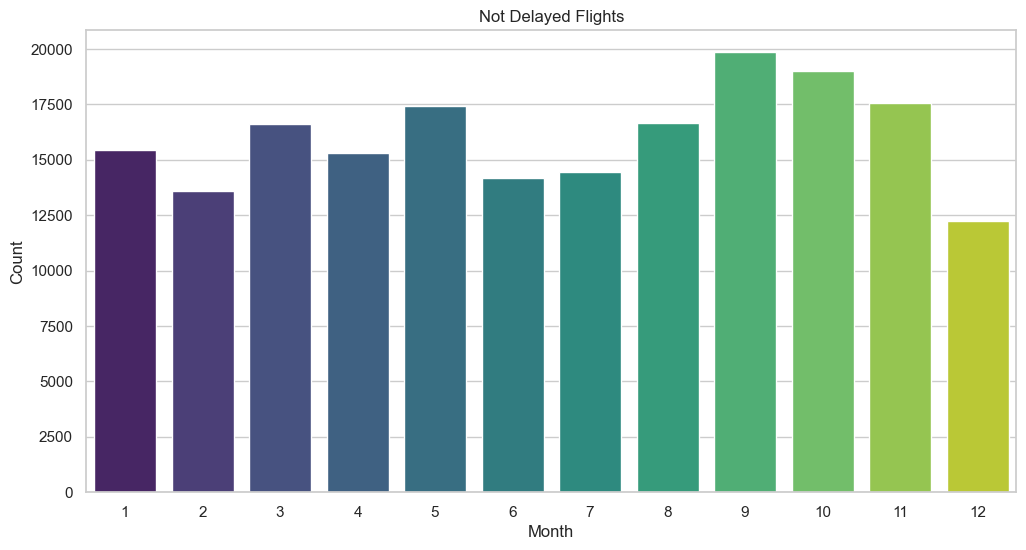

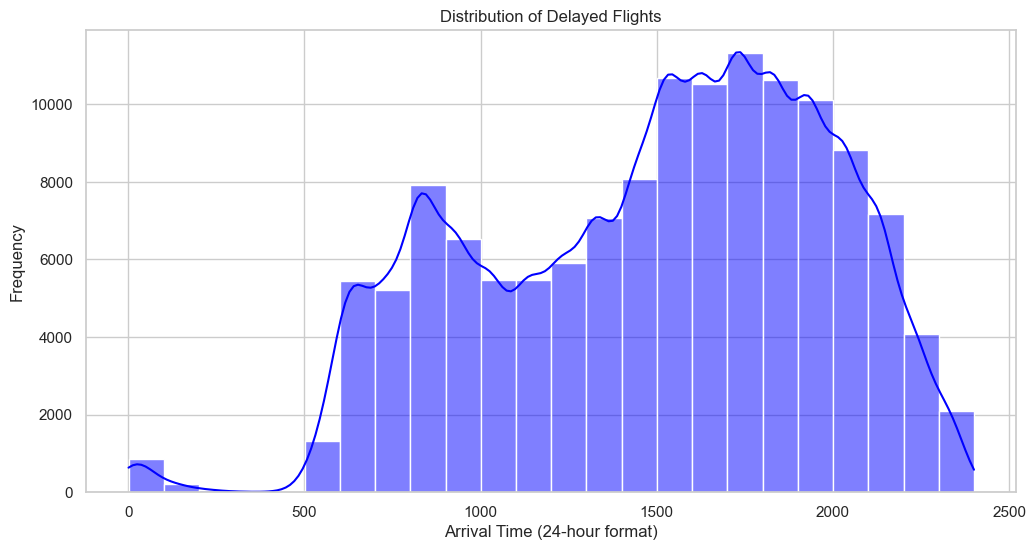

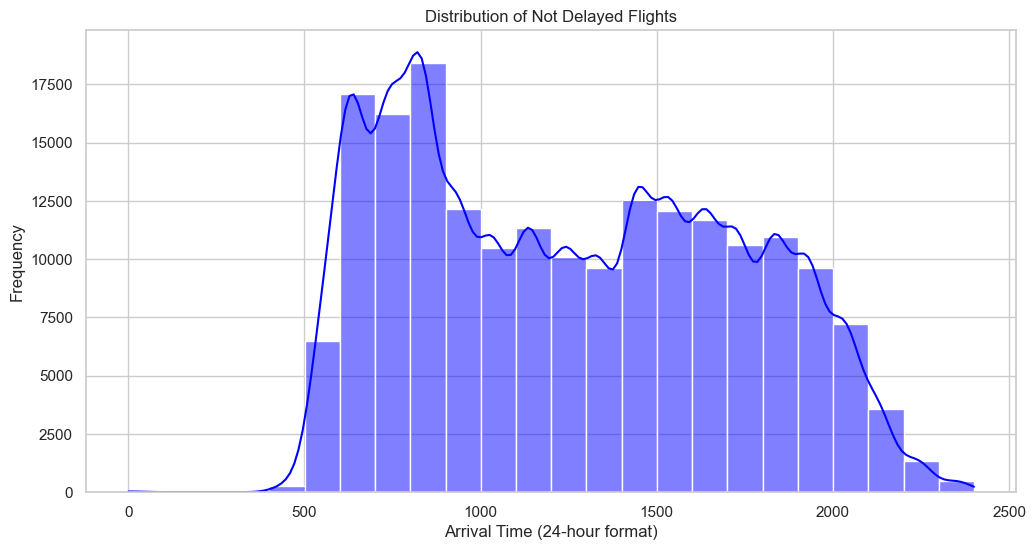

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_delayed = df[df['total_delay'] > 0]
df_not_delayed = df[df['total_delay'] <= 0]

countPlot(df, 12, 6, 'month', 'Flights', 'Month', 'Count') # Number of all flights per month
countPlot(df_delayed, 12, 6, 'month', 'Delayed Flights', 'Month', 'Count') # Number of delayed flights per month
countPlot(df_not_delayed, 12, 6, 'month', 'Not Delayed Flights', 'Month', 'Count') # Number of not delayed flights per month

histogramPlot(df_delayed, 24, 12, 6, 'dep_time', 'Distribution of Delayed Flights', 'Arrival Time (24-hour format)', 'Frequency', 'Blue') # distribution of delayed flights
histogramPlot(df_not_delayed, 24, 12, 6, 'dep_time', 'Distribution of Not Delayed Flights', 'Arrival Time (24-hour format)', 'Frequency', 'Blue') # distrubiton of not delayed flights


# Findings

June, July, and August (Summer) have the most flight delays. We suspect it might be due to people being out on the holidays causing more travels, therefore more congestion. Also may be due to weather conditions since Summer is the prime time for thunderstorms.

November, December, and January (Winter) have the second most flight delays, but December has the most flight delays out of all months. We suspect it might be due to the holidays, and not weather related as January and November have lower delays than the months of summer.

In [18]:
df_all_month_flights = df.groupby('month')['total_delay'].count()
df_all_month_delayed_flights = df[df['total_delay'] > 0].groupby('month')['total_delay'].count()

month_percentage_delays = df_all_month_delayed_flights / df_all_month_flights
print(month_percentage_delays)

month
1     0.415827
2     0.423955
3     0.405383
4     0.444057
5     0.380333
6     0.476454
7     0.488884
8     0.420121
9     0.265198
10    0.336781
11    0.349486
12    0.547113
Name: total_delay, dtype: float64


# Carrier

We can also see if the Carrier affects the delays by calculating the mean for each of them. This can help determine which carrier is more likely to experience delays. The model might be able to find management issues between carriers, so we can make decisions internally.

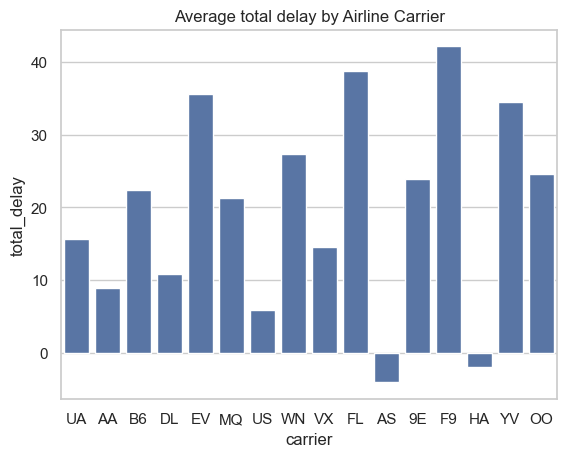

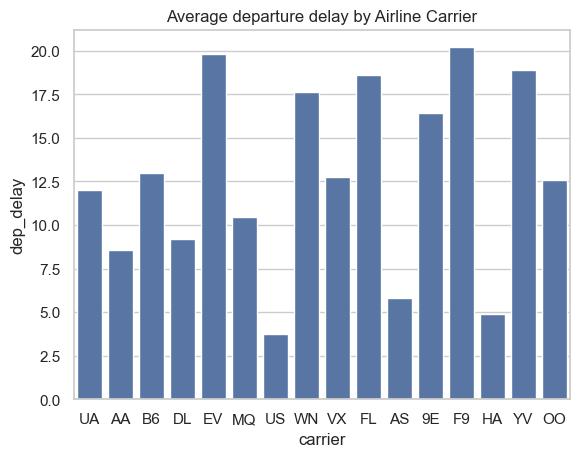

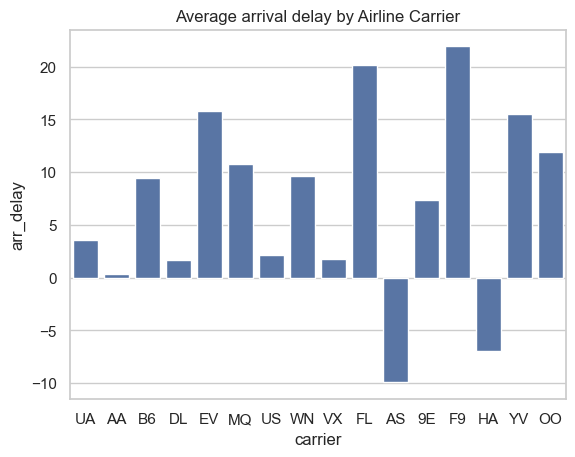

In [19]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('flights_EDA.csv')

carrier_total_delay = df.groupby('carrier')['total_delay'].mean().reset_index()
carrier_dept_delay = df.groupby('carrier')['dep_delay'].mean().reset_index()
carrier_arr_delay = df.groupby('carrier')['arr_delay'].mean().reset_index()

def barPlot(x_label, y_label, title):
  sns.barplot(x=x_label, y=y_label, data=df, errorbar=None)
  plt.title(title)
  plt.show()

# print(carrier_total_delay)
# print(carrier_dept_delay)
# print(carrier_arr_delay)

barPlot('carrier', 'total_delay', 'Average total delay by Airline Carrier')
barPlot('carrier', 'dep_delay', 'Average departure delay by Airline Carrier')
barPlot('carrier', 'arr_delay', 'Average arrival delay by Airline Carrier')


# Findings

Interestingly, the arrival delay mean of AS and HA is below 0. This might be due to AS and HA rescheduling flights so they can minimize departure delays. We can also see that certain carriers have high delay means compared to others which could suggest managment issues.

--------------------------------------------------------------------------------
# Average Delay for Each hour

We can interpret the peak times for each hour by plotting each hour on a line graph along with its total delay

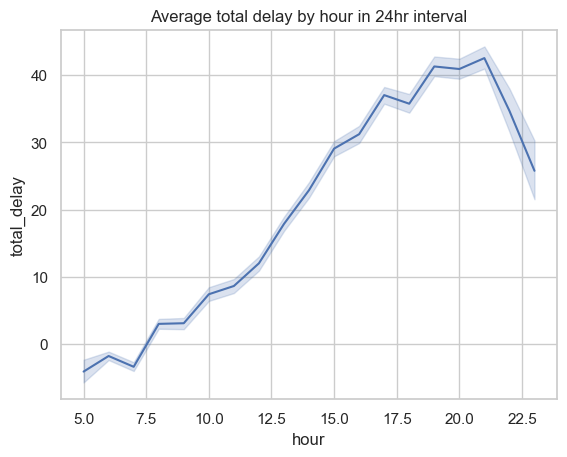

In [20]:

df['hour'] = pd.to_datetime(df['time_hour']).dt.hour
sns.lineplot(x='hour', y='total_delay', data= df)
plt.title('Average total delay by hour in 24hr interval')
plt.show()


# Peak Delay Hours

From examining this lineplot we can see that there is a peak from the hours of 10:00 to 19:00 in the 24-hour format
We can interpret from this that the peak period of delays is from 10:00am to 7:00pm, this indicates that
during these hours flights are inclined to face more departure delays

#Low Delay Hours
We can also interpret that the hours between 1:00am and 6:00am experience the lowest average dalays, which indicates that during
hours flights are inclined to face less delays

We can also see that As time increases (Hours throughout the day), flight delays tend to rise hitting a peak at around 19:00 to 20:00, but then
delays start decreasing after the peak hours, reducing the average departure delays

--------------------------------------------------------------------------------
# Numerical Features Analysis:

Before analyzing the numerical features, we aimed to understand the relationships between variables like departure delay, arrival delay, air time, distance, and the target variable, total delay. The scatter plots were used to visualize these relationships.

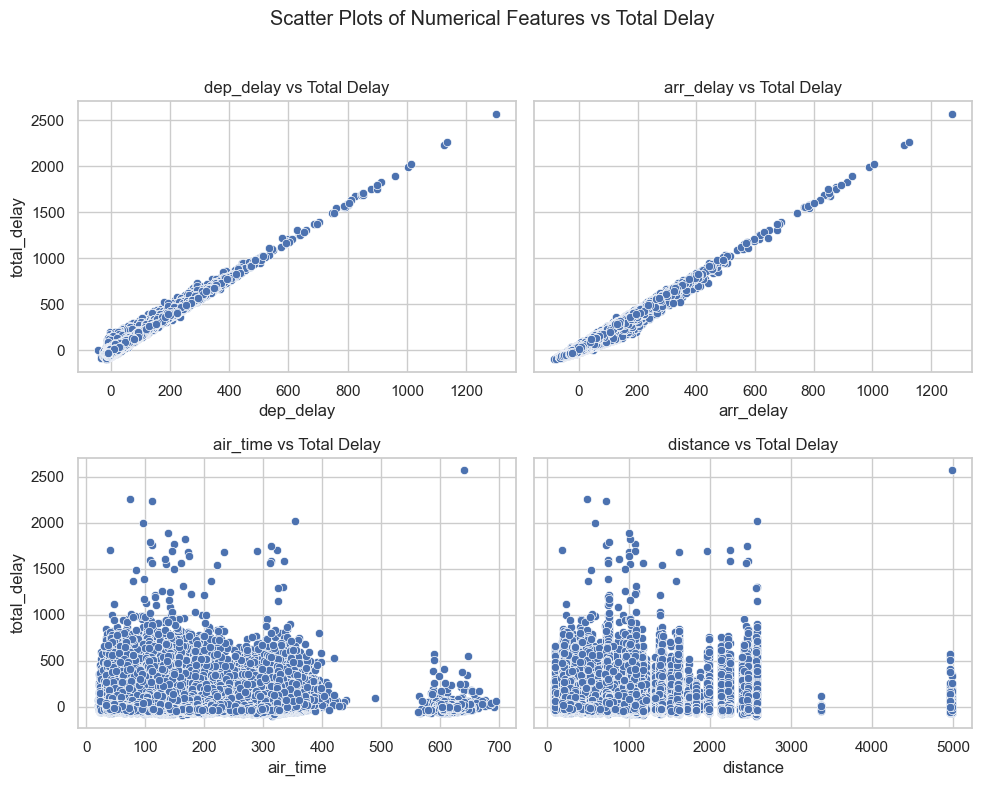

In [21]:
import seaborn as sns

# Select numerical features and the target variable
numerical_features = ['dep_delay', 'arr_delay', 'air_time', 'distance', 'total_delay']
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features and the target variable
numerical_features = ['dep_delay', 'arr_delay', 'air_time', 'distance', 'total_delay']

# Create subplots for each numerical feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharey=True)
fig.suptitle('Scatter Plots of Numerical Features vs Total Delay')

# Function to create scatter plots in subplots
def create_subplots(data, x_column, y_column, title, ax):
    sns.scatterplot(data=data, x=x_column, y=y_column, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)

# Create scatter plots for each numerical feature (excluding the target variable itself)
for i, col in enumerate(numerical_features[:-1]):  # Exclude 'total_delay' from the loop
    row = i // 2
    col_num = i % 2
    create_subplots(df, col, 'total_delay', f'{col} vs Total Delay', axes[row, col_num])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Findings

The correlation matrix obviously shows positive correlations between dep_delay, arr_delay, and total_delay, but since this data will not be known beforehand for future flights the model will not use them. The scatter plots confirmed these trends, showing clear linear relationships. In contrast, air_time and distance showed weak correlations with total_delay, suggesting they have minimal direct impact on delays.

--------------------------------------------------------------------------------
# Categorical Features Analysis:

For the categorical features (carrier, origin, and destination), we one-hot encoded the variables and created scatter plots to explore their relationship with total_delay.

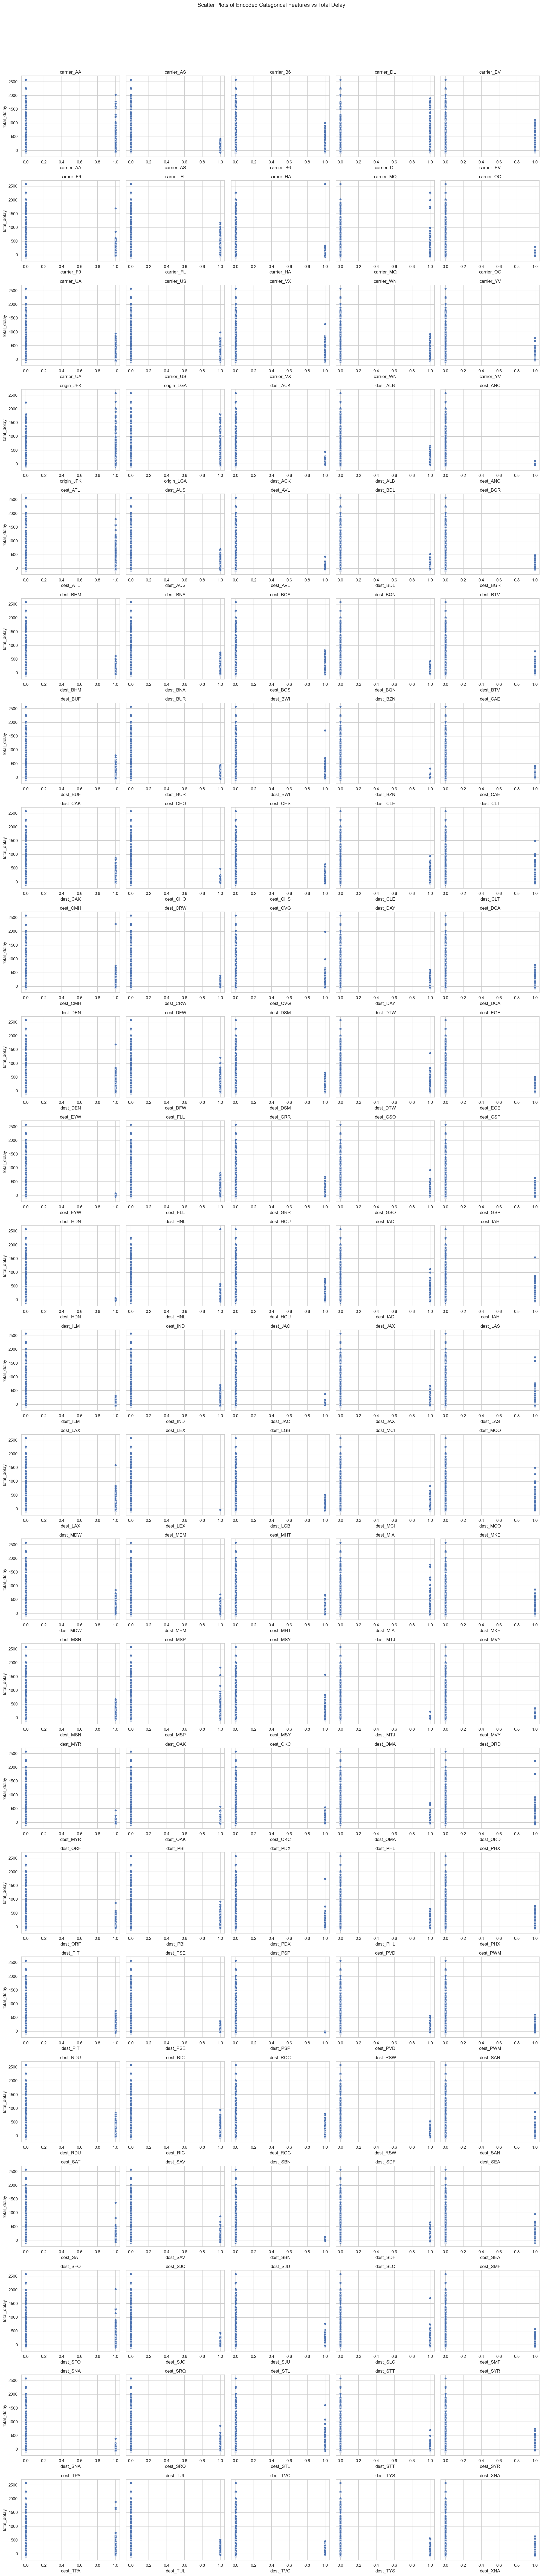

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# One-hot encode categorical features
categorical_features = ['carrier', 'origin', 'dest']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
target_column = 'total_delay'

# Display the first few rows of the encoded DataFrame
df_encoded.head()

# List of encoded categorical columns
encoded_categorical_columns = [col for col in df_encoded.columns if col.startswith(tuple(categorical_features))]

# Calculate the number of rows and columns needed for the subplot grid
num_features = len(encoded_categorical_columns)
num_cols = 5  # Number of columns in the grid
num_rows = (num_features // num_cols) + (1 if num_features % num_cols != 0 else 0)

# Create subplots for each encoded feature
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4 * num_rows), sharey=True)
fig.suptitle('Scatter Plots of Encoded Categorical Features vs Total Delay')

# Function to create scatter plots in subplots
def create_subplots(data, x_column, y_column, title, ax):
    sns.scatterplot(data=data, x=x_column, y=y_column, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)

# Create scatter plots for each encoded categorical feature
for i, col in enumerate(encoded_categorical_columns):
    row = i // num_cols
    col_num = i % num_cols
    create_subplots(df_encoded, col, target_column, col, axes[row, col_num])

# Hide any unused subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Findings

The scatter plots for the encoded categorical features did not reveal strong visual trends, as the binary nature of one-hot encoded variables makes it challenging to discern clear patterns. However, this analysis helps identify which specific carriers, origins, or destinations might have higher or lower delays, which can be further investigated using statistical tests or located in the classification modelling phase. The lack of clear trends suggests that categorical features may have a more nuanced or indirect impact on delays, requiring deeper analysis.

--------------------------------------------------------------------------------
Outlier Detection

We use the Interquartile Range (IQR) method to identify outliers. The IQR is the range between the first quartile (25th percentile, Q1) and the third quartile (75th percentile, Q3). Any data point that falls below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.

This information helps us understand which features are most affected by extreme values and guides further analysis.

In [23]:
# Detect outliers using IQR
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"Outliers in {feature}: {len(outliers)}")

Outliers in dep_delay: 42857
Outliers in arr_delay: 27880
Outliers in air_time: 5448
Outliers in distance: 709
Outliers in total_delay: 36433


# Date and Holidays

Since we suspected Holidays and the month, and its day might contribute to delays earlier, we need to plot each date on a line graph along with its mean delay time.

In [24]:
import pandas as pd
import datetime
import holidays

df = pd.read_csv('flights_EDA.csv')

us_holidays = holidays.US(years=[2013])


df['time_hour'] = pd.to_datetime(df['time_hour'])

df['date'] = df['time_hour'].dt.normalize()


df['is_holiday'] = df['date'].isin(us_holidays)

C:\Users\Eric\AppData\Local\Temp\ipykernel_15344\1628942851.py:15: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['is_holiday'] = df['date'].isin(us_holidays)


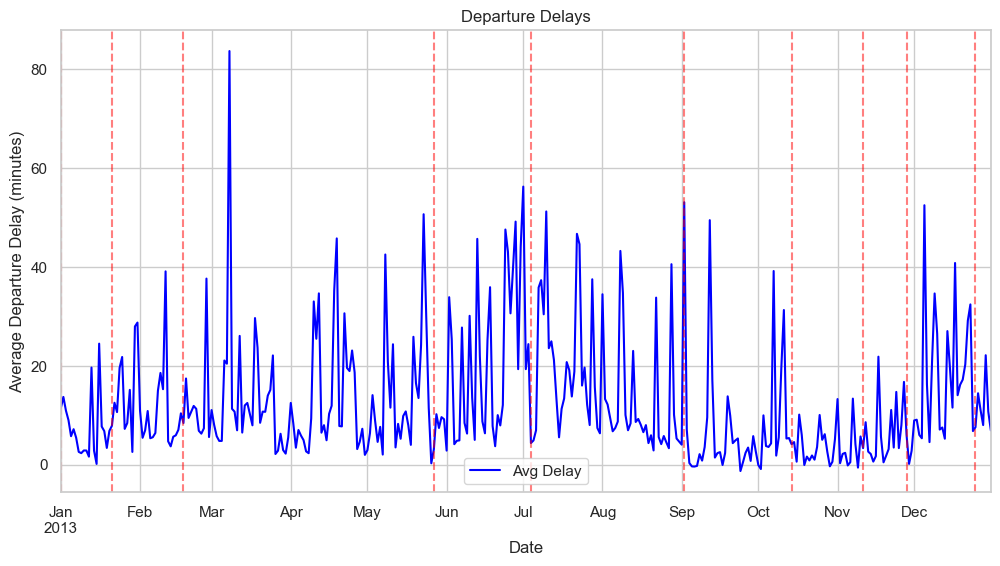

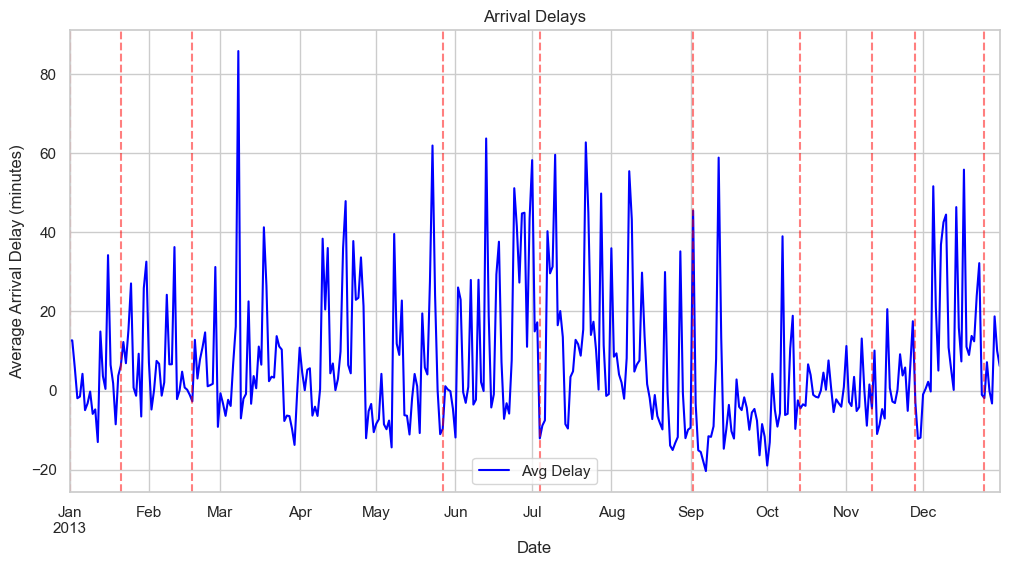

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

df.groupby('date')['dep_delay'].mean().plot(label="Avg Delay", color='blue')

holiday_dates = df[df['is_holiday']]['date'].unique()
for h_date in holiday_dates:
    plt.axvline(h_date, color='red', linestyle='--', alpha=0.5)

plt.xlabel("Date")
plt.ylabel("Average Departure Delay (minutes)")
plt.title("Departure Delays")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))

df.groupby('date')['arr_delay'].mean().plot(label="Avg Delay", color='blue')

holiday_dates = df[df['is_holiday']]['date'].unique()
for h_date in holiday_dates:
    plt.axvline(h_date, color='red', linestyle='--', alpha=0.5)

plt.xlabel("Date")
plt.ylabel("Average Arrival Delay (minutes)")
plt.title("Arrival Delays")
plt.legend()
plt.show()

# Findings

Delay times seem to spike on Certain Holidays. Also, there are a few dates where there is a large spike when they arent a holiday. This is could be weather related.

-----------------
# Feature Engineering

Since the season matters in flight delays we can categorize each month to their respective season

In [26]:
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create a new 'season' column
df['season'] = df['month'].apply(categorize_season)


# Peak Times

We can use a histogram and see the peak times for Departure Delays and Arrival Delays. We can use the distribution to indicate which hours suggest peak times.

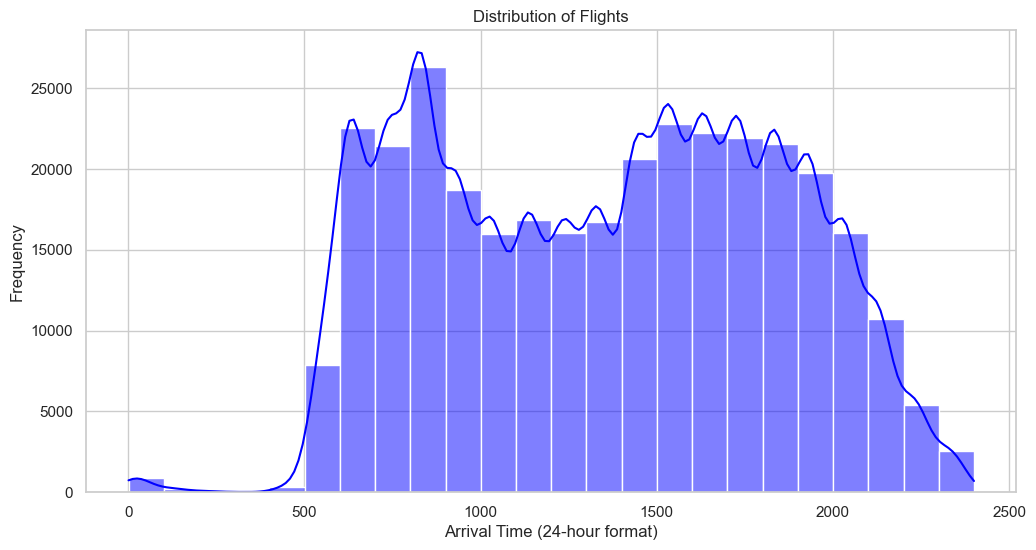

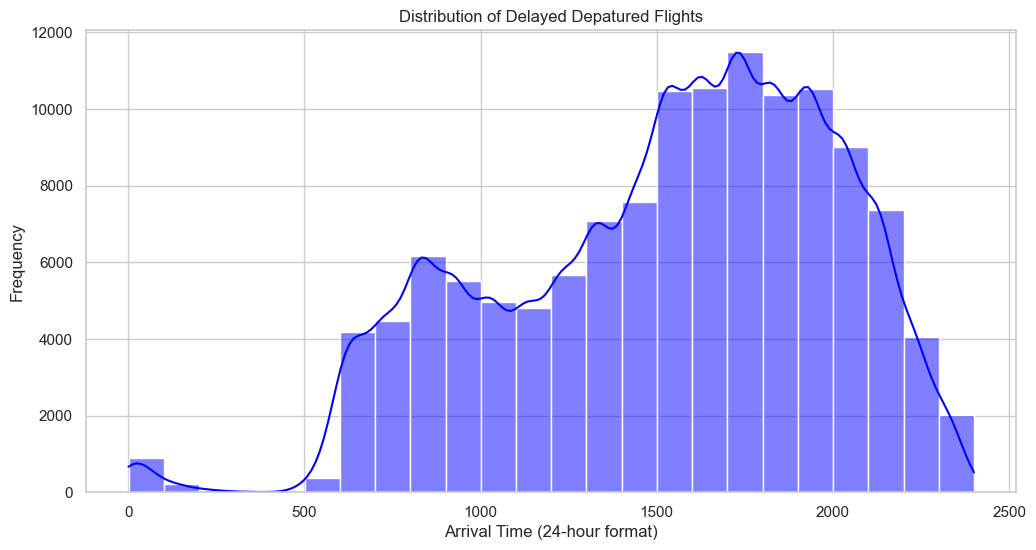

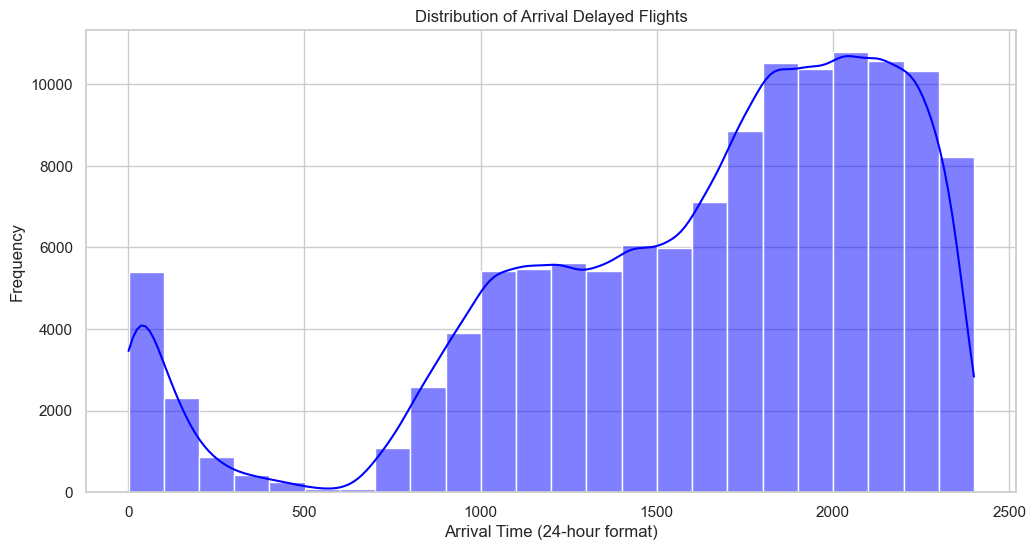

In [27]:
df_dep_delay = df[df['dep_delay'] > 0]
df_arr_delay = df[df['arr_delay'] > 0]

plt.figure(figsize=(12, 6))
sns.histplot(df['dep_time'], bins=24, kde=True, color='Blue')
plt.title('Distribution of Flights')
plt.xlabel('Arrival Time (24-hour format)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_dep_delay['dep_time'], bins=24, kde=True, color='Blue')
plt.title('Distribution of Delayed Depatured Flights')
plt.xlabel('Arrival Time (24-hour format)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_dep_delay['arr_time'], bins=24, kde=True, color='Blue')
plt.title('Distribution of Arrival Delayed Flights')
plt.xlabel('Arrival Time (24-hour format)')
plt.ylabel('Frequency')
plt.show()

# Findings:

Departure Delays tend to peak at 15:00-20:00, while Arrival times tend to peak at 16:00-23:59.

-----------
# Feature Engineering

We can categorize these peak times to improve our model. Depending on performance this feature be included or not.

In [28]:
# feature engineering for dep peak times
def dep_time_category(hour):
    if 0 <= hour < 600:
        return "early_morning"
    elif 600 <= hour < 1200:
        return "morning"
    elif 1200 <= hour < 1500:
        return "afternoon"
    elif 1500 <= hour < 2000:
        return "afternoon/evening_dep_rush"
    else:
        return 'evening'

# feature engineering for arr peak times
def arr_time_category(hour):
    if 0 <= hour < 100:
        return "early_morning_rush"
    elif 100 <= hour < 700:
        return "early_morning_slowdown"
    elif 700 <= hour < 1200:
        return "morning"
    elif 1200 <= hour < 1600:
        return "afternoon"
    elif 1600 <= hour < 2400:
        return "evening_rush"

# add the new column
df["dep_time_category"] = df["dep_time"].apply(dep_time_category)
df["arr_time_category"] = df["arr_time"].apply(dep_time_category)

In [30]:
# remove noise
df = df[df['air_time'] > 0]

df.to_csv('flights_EDA.csv', index=False)

# Airport Flight Weather Dataset Merge

Since we suspected delays might be caused by weather, we need the weather data for the airports for each date and time. We managed to find a weather dataset with the airports weather for all dates and times.

In [31]:
# weather airport dataset merge to main flights
df = pd.read_csv('flights_EDA.csv')
wdf = pd.read_csv('weather.csv')

df_weather_merge = pd.merge(df, wdf, on=['origin', 'month', 'day', 'hour', 'year'])

df_weather_merge.to_csv('merged_flight_weather_data.csv', index=False)




# KNN

After merging we use KNN to fill the missing weather values caused by the merge.

In [32]:
import pandas as pd
from sklearn.impute import KNNImputer
import os

output_file = 'merged_flight_weather_data_knn.csv'

# Only run if output file doesn't exist
if not os.path.exists(output_file):
    print("Processing file... (This may take ~30 minutes)")
    
    # Load data
    df_flights_weather = pd.read_csv('merged_flight_weather_data.csv')

    # Check missing values
    missing_values = df_flights_weather.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    print("Missing values found:")
    print(missing_values)

    # Columns to impute
    missing_columns = ['temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'pressure']

    # Perform KNN imputation
    imputer = KNNImputer(n_neighbors=5)
    df_flights_weather[missing_columns] = imputer.fit_transform(df_flights_weather[missing_columns])

    # Save results
    df_flights_weather.to_csv(output_file, index=False)
    print(f"File saved as {output_file}")
else:
    print(f"File {output_file} already exists - skipping imputation")

File merged_flight_weather_data_knn.csv already exists - skipping imputation


In [33]:
df_flights_weather = pd.read_csv('merged_flight_weather_data_knn.csv')
missing_values = df_flights_weather.isnull().sum()
print(missing_values)

id                   0
year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time             0
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time             0
distance             0
hour                 0
minute               0
time_hour_x          0
name                 0
missing_count        0
flight_status        0
total_delay          0
date                 0
is_holiday           0
season               0
dep_time_category    0
arr_time_category    0
temp                 0
dewp                 0
humid                0
wind_dir             0
wind_speed           0
wind_gust            0
precip               0
pressure             0
visib                0
time_hour_y          0
dtype: int64


# Precipitation

Our goal is to see whether Precipitation effects flight delays. Therefore we can plot the precipitation values and its mean delay times to see if there are any patterns.

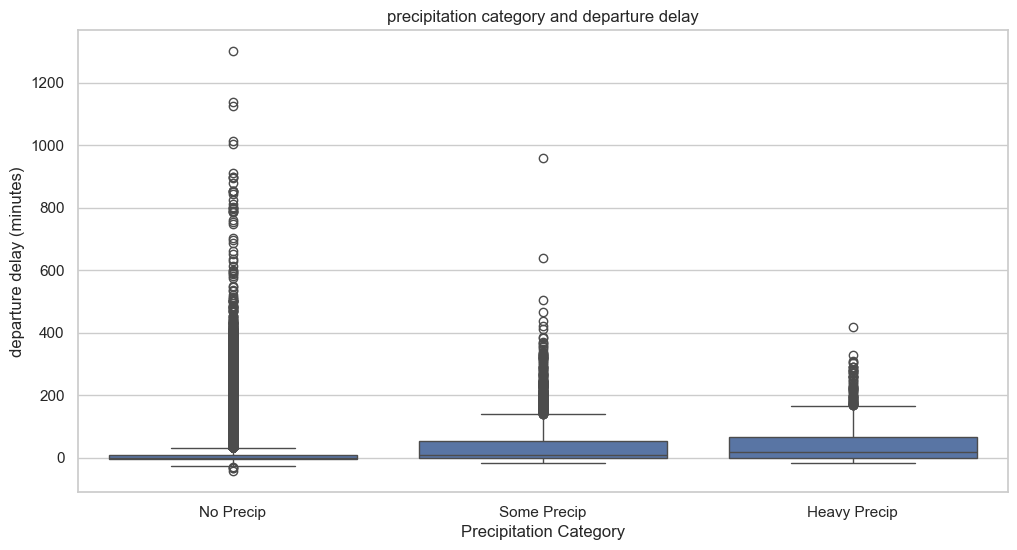

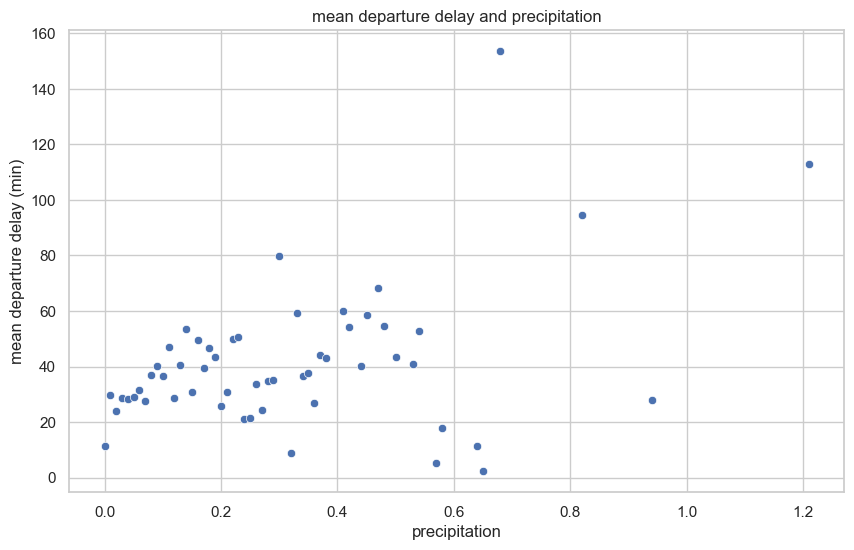

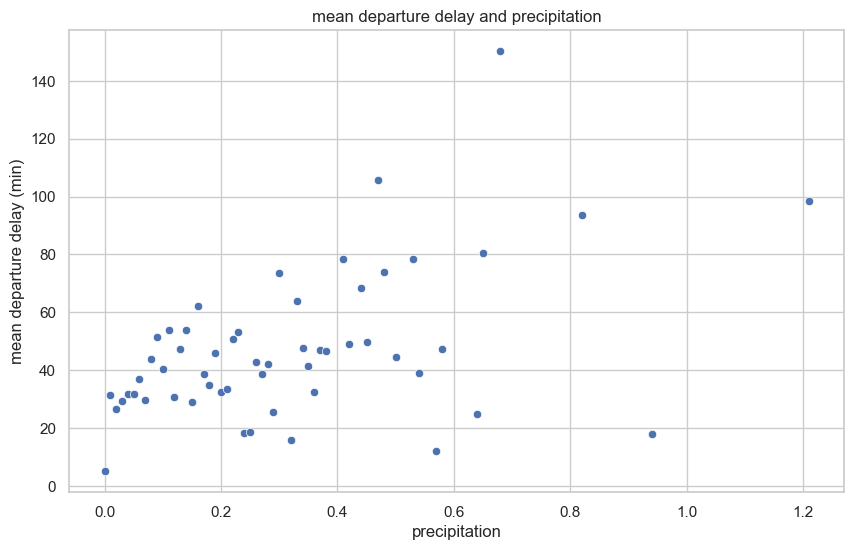

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_flights_weather = pd.read_csv('merged_flight_weather_data_knn.csv')

# bin the precipitation values into categories
df_flights_weather['precip_category'] = pd.cut(df_flights_weather['precip'], bins=[0, 0.1, 0.3, float('inf')], labels=['No Precip', 'Some Precip', 'Heavy Precip'], right=False)

#boxplot them
plt.figure(figsize=(12, 6))
sns.boxplot(x='precip_category', y='dep_delay', data=df_flights_weather)
plt.title('precipitation category and departure delay')
plt.xlabel('Precipitation Category')
plt.ylabel('departure delay (minutes)')
plt.show()

#get the depature delay mean for precip values
mean_dep_delay_percip = df_flights_weather.groupby('precip')['dep_delay'].mean().reset_index()

# plot them against dep delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precip', y='dep_delay', data=mean_dep_delay_percip)
plt.title('mean departure delay and precipitation')
plt.xlabel('precipitation')
plt.ylabel('mean departure delay (min)')
plt.show()

#get the depature delay mean for precip values
mean_arr_delay_percip = df_flights_weather.groupby('precip')['arr_delay'].mean().reset_index()
# plot them against arr delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precip', y='arr_delay', data=mean_arr_delay_percip)
plt.title('mean departure delay and precipitation')
plt.xlabel('precipitation')
plt.ylabel('mean departure delay (min)')
plt.show()

df_flights_weather['precip_category'] = pd.cut(df_flights_weather['precip'], bins=[0, 0.1, 0.3, float('inf')], labels=['No Precip', 'Some Precip', 'Heavy Precip'], right=False)

# Findings

There seems to be a positive correlation between preciipitation and its mean delay times. The higher the precipitation value the higher the delay time is indicating precipitation is a factor in delays.

# Dew point

We can find if other weather variables effect delays such as dew point. We can use the same method previously to see if dew point effects delays.

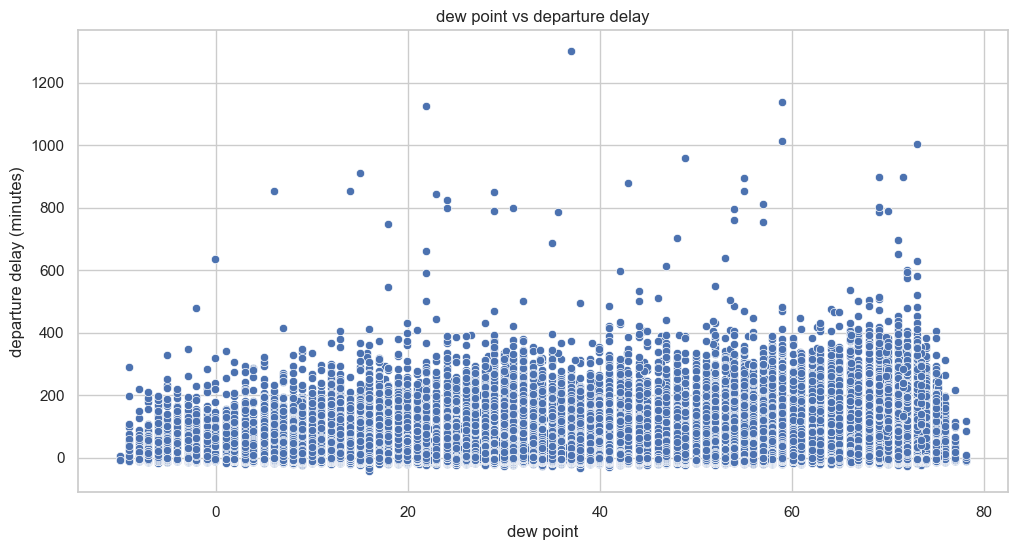

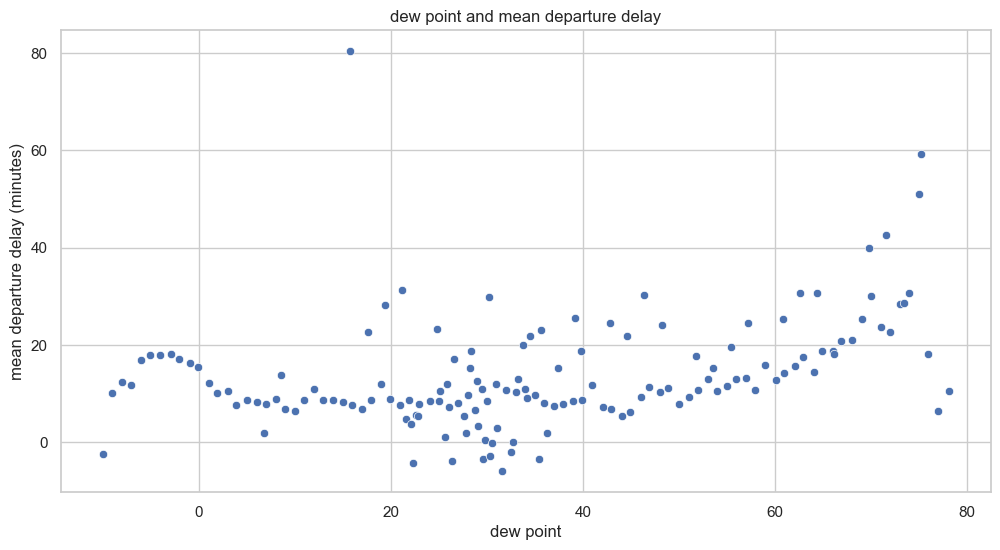

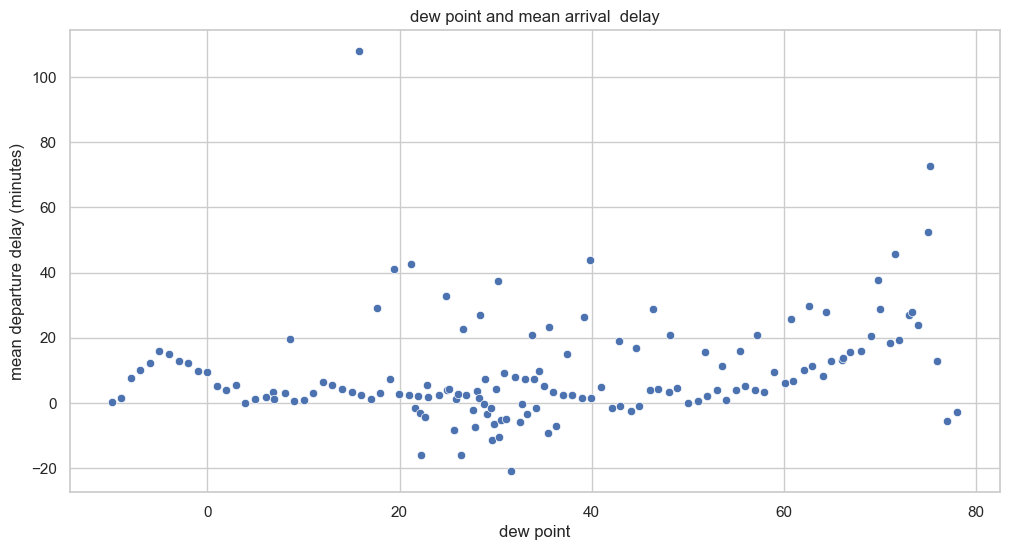

In [35]:
# plot dewpoint and departure delays
plt.figure(figsize=(12, 6))
sns.scatterplot(x='dewp', y='dep_delay', data=df_flights_weather)
plt.title('dew point vs departure delay')
plt.xlabel('dew point')
plt.ylabel('departure delay (minutes)')
plt.show()

# mean dep delay for dewpoint values
mean_dep_delay_dewp = df_flights_weather.groupby("dewp")["dep_delay"].mean().reset_index()

# plot dew point and mean dep delay
plt.figure(figsize=(12, 6))
sns.scatterplot(x='dewp', y='dep_delay', data=mean_dep_delay_dewp)
plt.title('dew point and mean departure delay')
plt.xlabel('dew point')
plt.ylabel('mean departure delay (minutes)')
plt.show()

mean_arr_delay_dewp = df_flights_weather.groupby('dewp')['arr_delay'].mean().reset_index()

# plot dew point and mean arrival delay
plt.figure(figsize=(12, 6))
sns.scatterplot(x='dewp', y='arr_delay', data=mean_arr_delay_dewp)
plt.title('dew point and mean arrival  delay')
plt.xlabel('dew point')
plt.ylabel('mean departure delay (minutes)')
plt.show()

# Findings

There seems to be no meaningful pattern between dew point and delays. There is no linear correlation or anything interesting in the graph.

--------------
# Humidity

We can use the same method to find the patterns between humidity and the delays

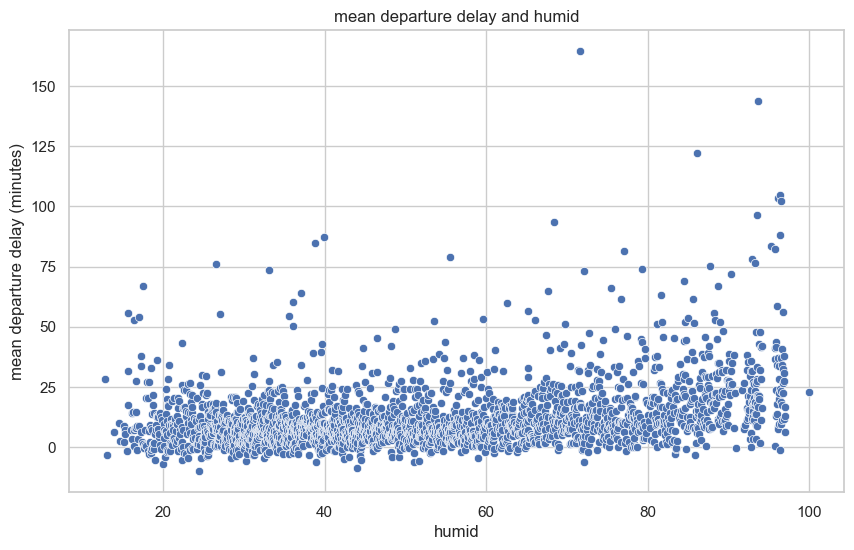

In [36]:
mean_dep_delay_visib = df_flights_weather.groupby('humid')['dep_delay'].mean().reset_index()

# plot of visibility and dep delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humid', y='dep_delay', data=mean_dep_delay_visib)
plt.title('mean departure delay and humid')
plt.xlabel('humid')
plt.ylabel('mean departure delay (minutes)')
plt.show()

# Findings

There doesnt seem to be anything meaningful between humidity and delay time shown in the graph. Therefore humidity does not effect flight delays.

# Visibility

We can use the same method to find if visibility effects delays.

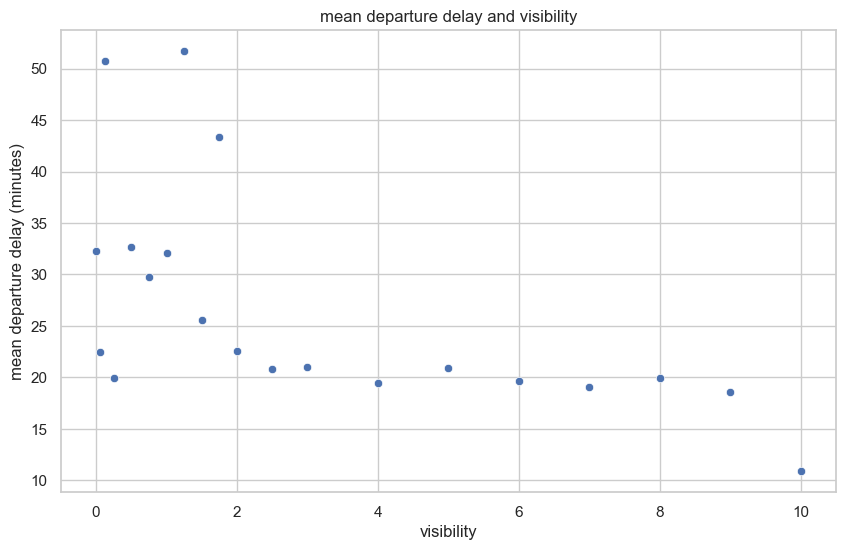

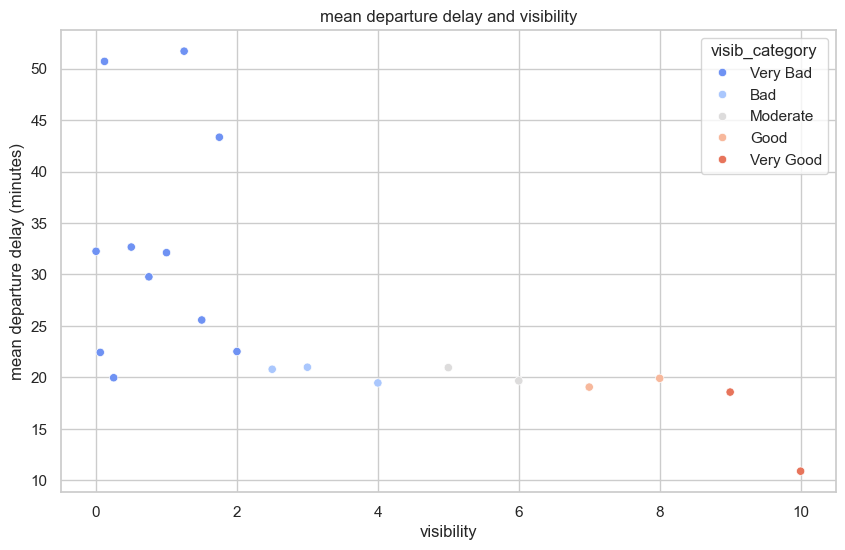

In [37]:
# dep delay mean for visibility values
mean_dep_delay_visib = df_flights_weather.groupby('visib')['dep_delay'].mean().reset_index()

# plot of visibility and dep delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visib', y='dep_delay', data=mean_dep_delay_visib)
plt.title('mean departure delay and visibility')
plt.xlabel('visibility')
plt.ylabel('mean departure delay (minutes)')
plt.show()

# bin the visibility values into categorical attributes for feature engieering
wind_visb_bin = [-float('inf'), 2, 4, 6, 8, float('inf')]
wind_visb_label = ['Very Bad', 'Bad', 'Moderate', 'Good', 'Very Good']

mean_dep_delay_visib['visib_category'] = pd.cut(mean_dep_delay_visib['visib'], bins=wind_visb_bin, labels=wind_visb_label)

# show the bins
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visib', y='dep_delay', data=mean_dep_delay_visib, hue="visib_category", palette="coolwarm")
plt.title('mean departure delay and visibility')
plt.xlabel('visibility')
plt.ylabel('mean departure delay (minutes)')
plt.legend(title='visib_category')
plt.show()

# add new category
df_flights_weather['visib_category'] = pd.cut(df_flights_weather['visib'], bins=wind_visb_bin, labels=wind_visb_label)


# Findings

Low Visibility values between 0-2 is a major cause in delays. Low Visibility indicates pilots have a hard time seeing therefore causing higher delays.

-----------------
# Wind Speed

We can use the same method to find if wind speed effects delays

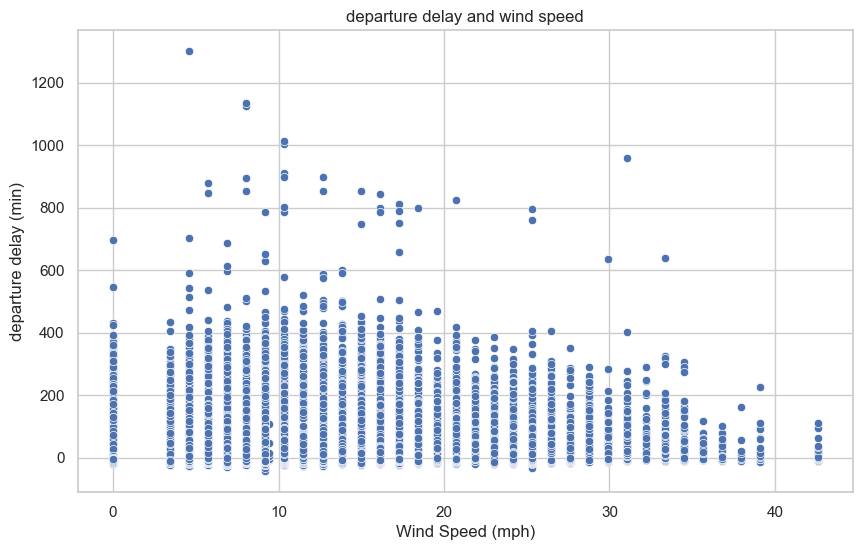

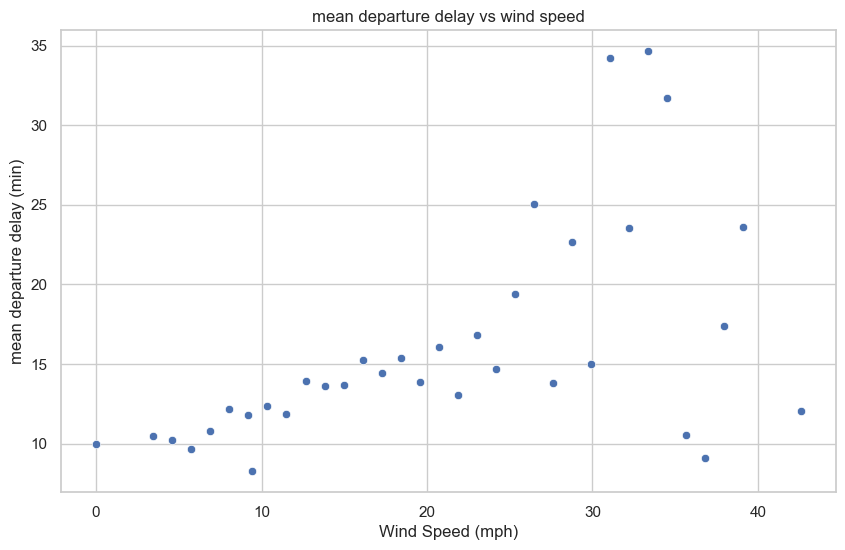

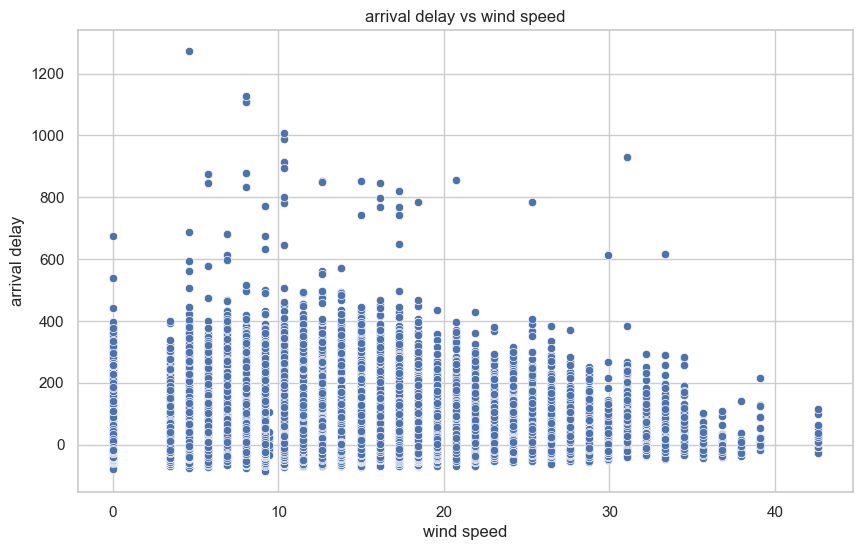

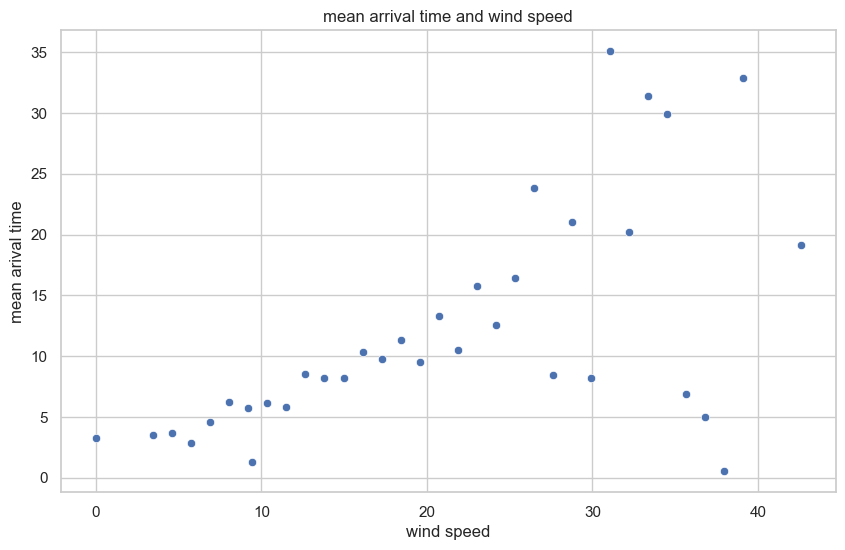

In [38]:
# plot the wind speed and dep delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='dep_delay', data=df_flights_weather)
plt.title('departure delay and wind speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('departure delay (min)')
plt.show()

mean_dep_delay_wind_speed = df_flights_weather.groupby('wind_speed')['dep_delay'].mean().reset_index()

# plot the mean dep_delay and wind_speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='dep_delay', data=mean_dep_delay_wind_speed)
plt.title('mean departure delay vs wind speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('mean departure delay (min)')
plt.show()

# plot the arr_delay and wind_speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='arr_delay', data=df_flights_weather)
plt.title('arrival delay vs wind speed')
plt.xlabel('wind speed')
plt.ylabel('arrival delay')
plt.show()

mean_arr_delay_wind_speed = df_flights_weather.groupby('wind_speed')['arr_delay'].mean().reset_index()

# plot mean arr_delay and wind_speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='arr_delay', data=mean_arr_delay_wind_speed)
plt.title('mean arrival time and wind speed')
plt.xlabel('wind speed')
plt.ylabel('mean arival time')
plt.show()


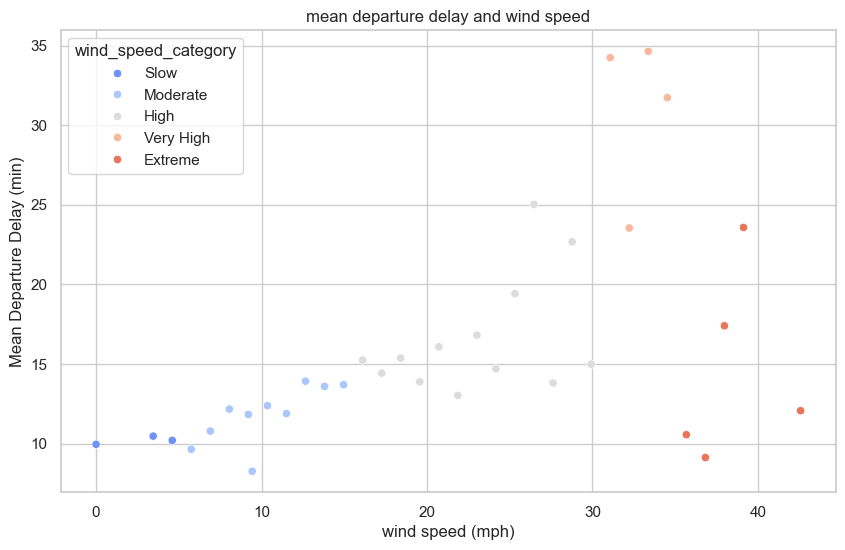

In [39]:
# create the bin for the wind gust value
wind_speed_bin = [-float('inf'), 5, 15, 30, 35, float('inf')]
wind_speed_label = ['Slow', 'Moderate', 'High', 'Very High', 'Extreme']


mean_dep_delay_wind_speed['wind_speed_category'] = pd.cut(mean_dep_delay_wind_speed['wind_speed'], bins=wind_speed_bin, labels=wind_speed_label)

# plot wind speed and mean dep delay bin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='dep_delay', data=mean_dep_delay_wind_speed, hue='wind_speed_category', palette='coolwarm')
plt.title('mean departure delay and wind speed')
plt.xlabel('wind speed (mph)')
plt.ylabel('Mean Departure Delay (min)')
plt.legend(title='wind_speed_category')
plt.show()

df_flights_weather['wind_speed_category'] = pd.cut(df_flights_weather['wind_speed'], bins=wind_speed_bin, labels=wind_speed_label)

# Findings

Wind speed impacts delays. The higher the wind speed, the higher the delay. However for extreme wind speeds delays seem to decrease. This might be due to other factors such as certain planes being able to withstand the high wind speeds, or flights being rescheduled to prevent delay.

# Wind Gust

We can use the same method to find patterns between Wind Gust and delays

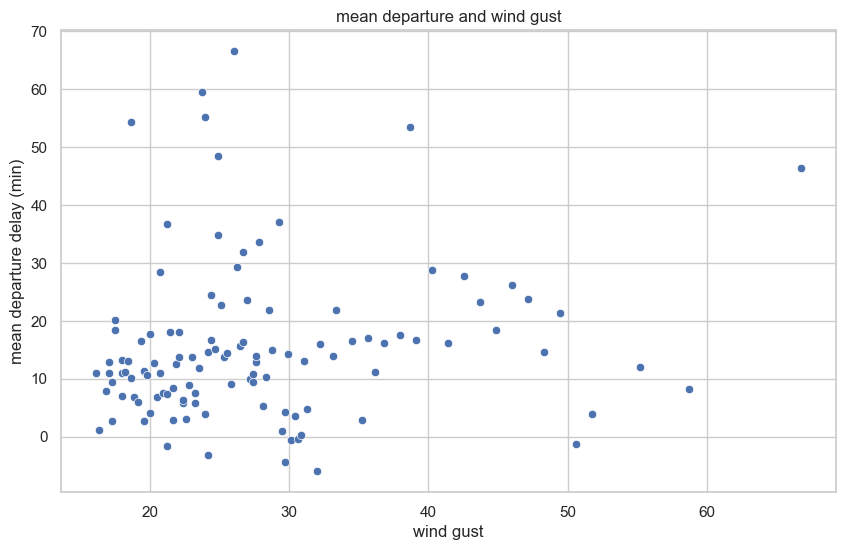

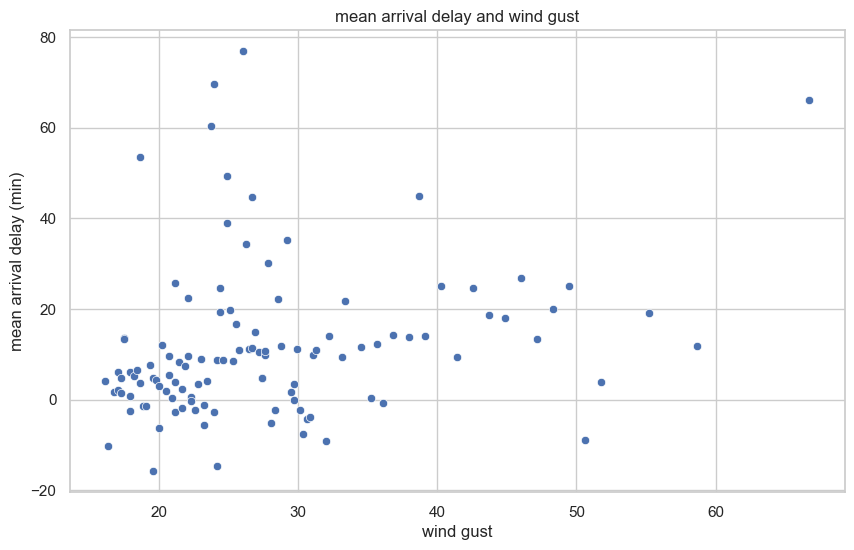

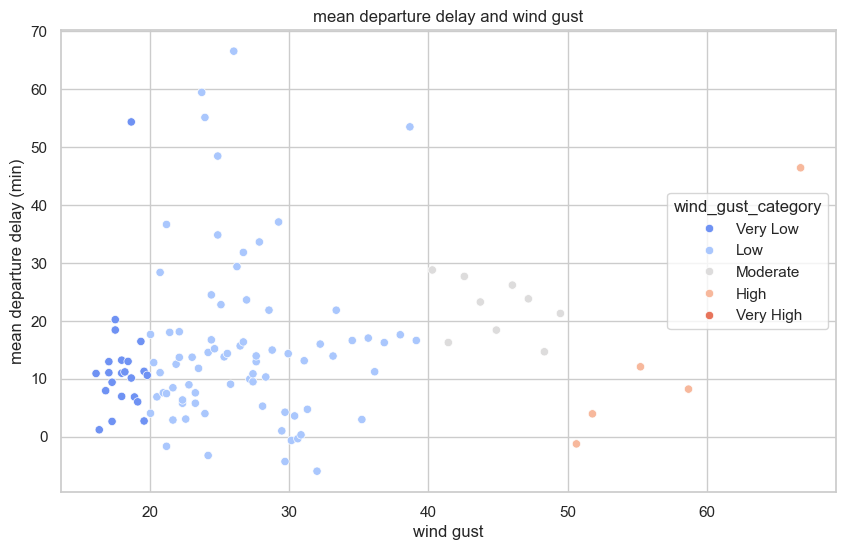

In [40]:
mean_dep_delay_wind_gust= df_flights_weather.groupby("wind_gust")["dep_delay"].mean().reset_index()
mean_arr_delay_wind_gust= df_flights_weather.groupby("wind_gust")["arr_delay"].mean().reset_index()
# plot wind gust and mean dep delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x="wind_gust", y="dep_delay", data=mean_dep_delay_wind_gust)
plt.title('mean departure and wind gust')
plt.xlabel('wind gust')
plt.ylabel('mean departure delay (min)')
plt.show()

# plot wind gust and mean arrival delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_gust', y='arr_delay', data=mean_arr_delay_wind_gust)
plt.title('mean arrival delay and wind gust')
plt.xlabel('wind gust')
plt.ylabel('mean arrival delay (min)')
plt.show()

# bin the wind gust to categories
wind_gust_bin = [-float('inf'), 20, 40, 50, 80, float('inf')]
wind_gust_label = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

mean_dep_delay_wind_gust['wind_gust_category'] = pd.cut(mean_dep_delay_wind_gust['wind_gust'], bins=wind_gust_bin, labels=wind_gust_label)

# plot wind guest and mean dep delay bin
plt.figure(figsize=(10, 6))
sns.scatterplot(x="wind_gust", y="dep_delay", data=mean_dep_delay_wind_gust, hue="wind_gust_category", palette="coolwarm")
plt.title('mean departure delay and wind gust')
plt.xlabel('wind gust')
plt.ylabel('mean departure delay (min)')
plt.legend(title='wind_gust_category')
plt.show()

df_flights_weather['wind_gust_category'] = pd.cut(df_flights_weather['wind_gust'], bins=wind_gust_bin, labels=wind_gust_label)

# Findings

There seems to be a pattern between wind gust and delays. The higher the wind gust, is the higher the delay.

# Temperature

We can use the same method to find patterns between temperature and delay

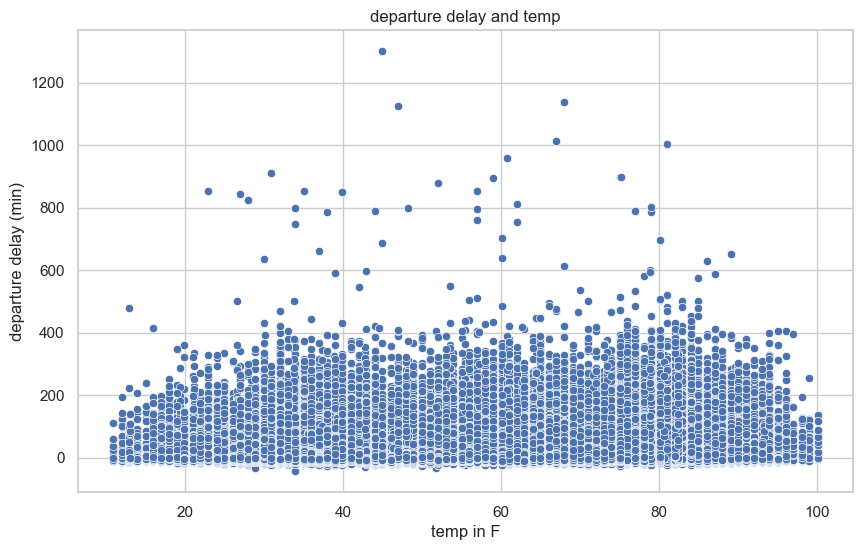

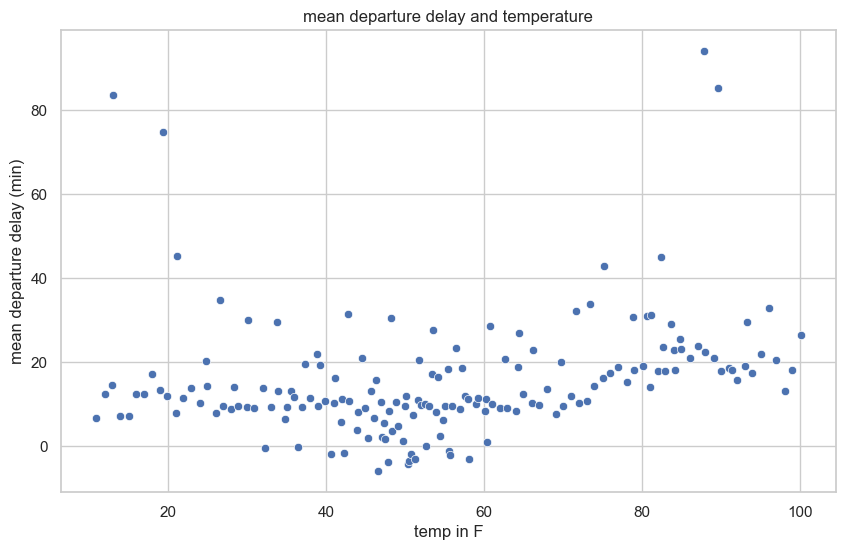

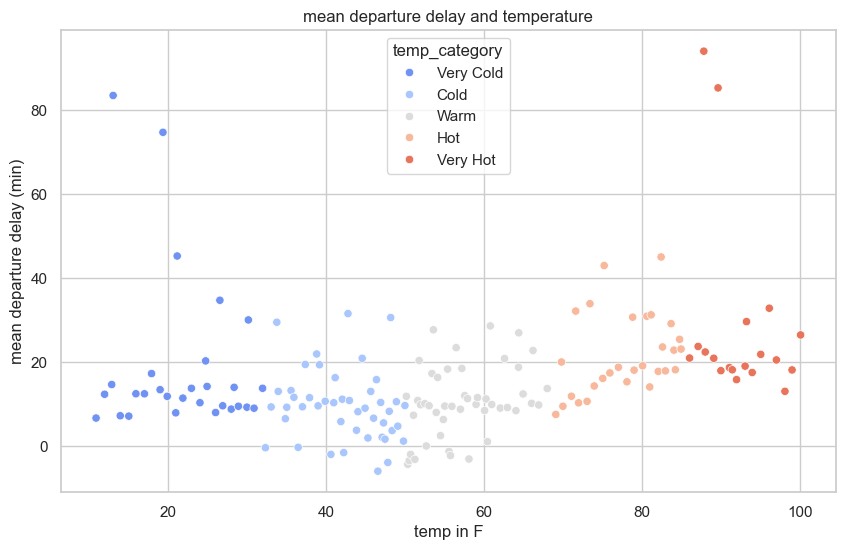

In [41]:
# plot the temp and departure delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x="temp", y="dep_delay", data=df_flights_weather)
plt.title("departure delay and temp")
plt.xlabel("temp in F")
plt.ylabel('departure delay (min)')
plt.show()

mean_dep_delay_temp = df_flights_weather.groupby('temp')['dep_delay'].mean().reset_index()

# plot the temp and dep delay mean
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='dep_delay', data=mean_dep_delay_temp)
plt.title('mean departure delay and temperature')
plt.xlabel('temp in F')
plt.ylabel('mean departure delay (min)')
plt.show()

# bin the temps to categories
bins = [-float('inf'), 32, 50, 68, 85, float('inf')]
labels = ['Very Cold', 'Cold', 'Warm', 'Hot', 'Very Hot']

mean_dep_delay_temp['temp_category'] = pd.cut(mean_dep_delay_temp['temp'], bins=bins, labels=labels)

# plot the bin of temp and dep_delay mean
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='dep_delay', data=mean_dep_delay_temp, hue='temp_category', palette="coolwarm")
plt.title('mean departure delay and temperature')
plt.xlabel('temp in F')
plt.ylabel('mean departure delay (min)')
plt.legend(title='temp_category')
plt.show()

df_flights_weather['temp_category'] = pd.cut(df_flights_weather['temp'], bins=bins, labels=labels)

# Findings

Interestingly there is a quadratic pattern between very cold temperatures and very hot temperatures. For very Cold weather, delay times seem to increase. This is the same for very hot weawther. We can conclude the temperature impacts delays.

# Wind Direction

We can use the same method to find the pattern between wind direction and delay

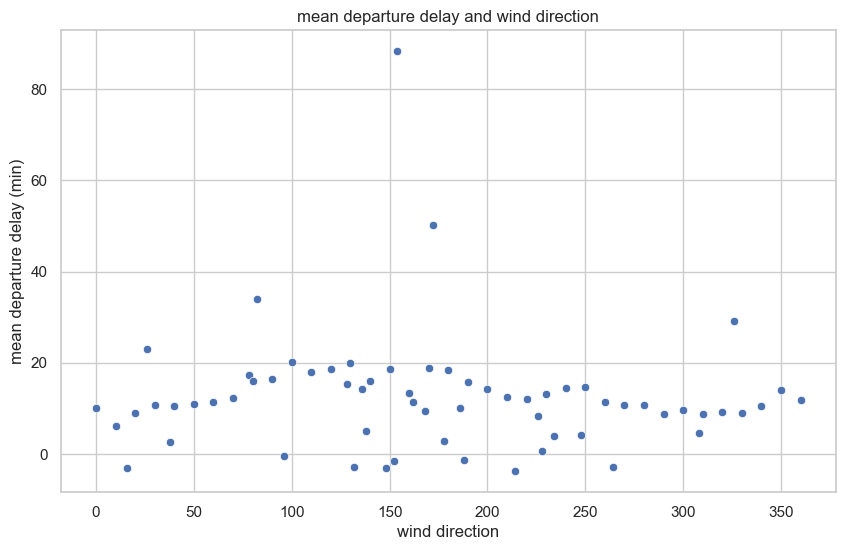

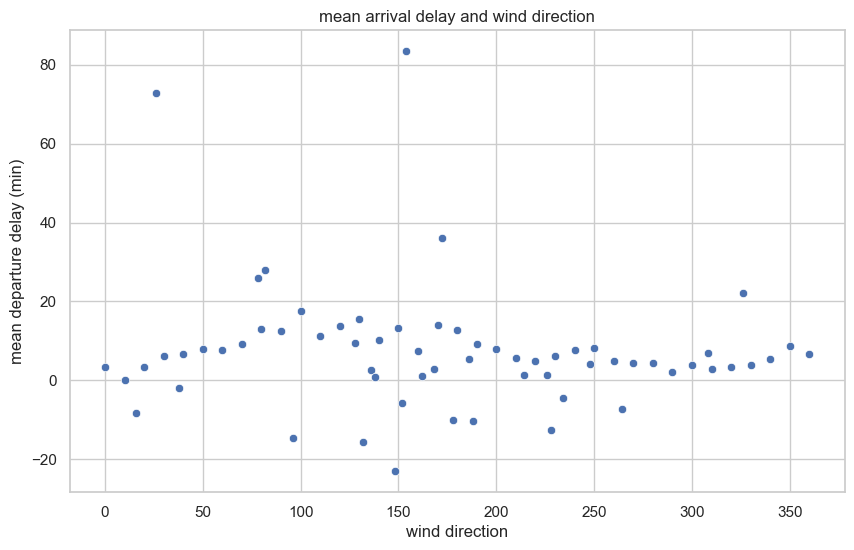

In [42]:
mean_dep_delay_wind_dir= df_flights_weather.groupby('wind_dir')['dep_delay'].mean().reset_index()
mean_arr_delay_wind_dir= df_flights_weather.groupby('wind_dir')['arr_delay'].mean().reset_index()
# plot the mean of departure delay and wind direction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_dir', y='dep_delay', data=mean_dep_delay_wind_dir)
plt.title('mean departure delay and wind direction')
plt.xlabel('wind direction')
plt.ylabel('mean departure delay (min)')
plt.show()

# plot the mean of arrival delay and wind direction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_dir', y='arr_delay', data=mean_arr_delay_wind_dir)
plt.title('mean arrival delay and wind direction')
plt.xlabel('wind direction')
plt.ylabel('mean departure delay (min)')
plt.show()



# Findings

There seems to be no pattern between wind direction and delay. Therefore we can conclude wind direction does not effect delay.

------------------
# Pressure

We can find the pattern between pressure and delay using the same method

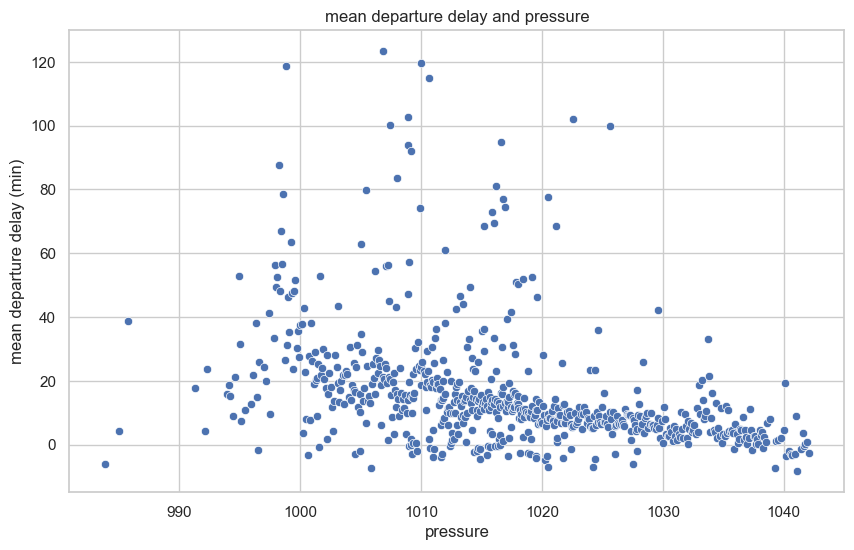

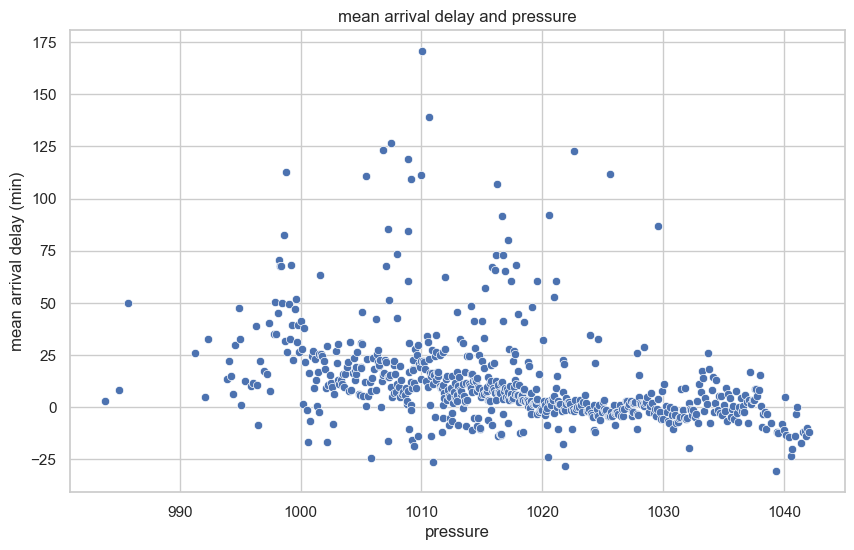

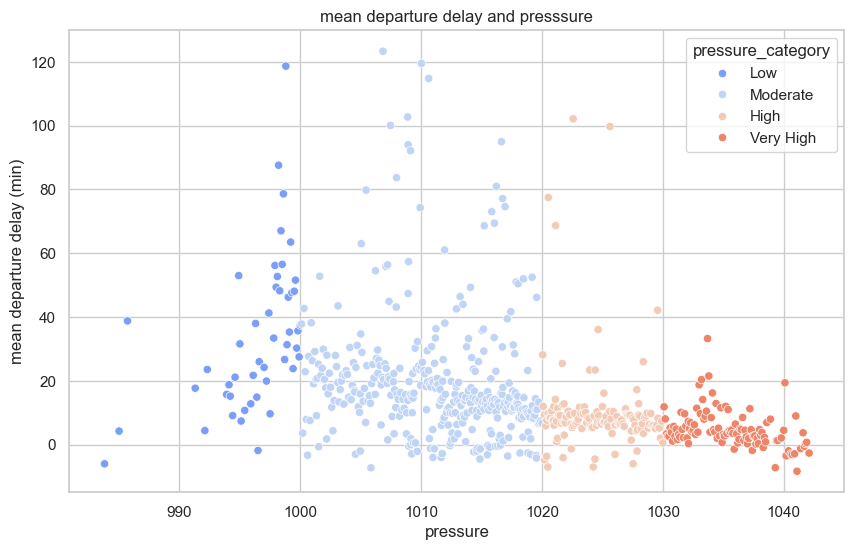

In [43]:
mean_dep_delay_pressure= df_flights_weather.groupby('pressure')['dep_delay'].mean().reset_index()
mean_arr_delay_pressure= df_flights_weather.groupby('pressure')['arr_delay'].mean().reset_index()

# plot the pressure and dep delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pressure', y='dep_delay', data=mean_dep_delay_pressure)
plt.title('mean departure delay and pressure')
plt.xlabel("pressure")
plt.ylabel('mean departure delay (min)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x="pressure", y="arr_delay", data=mean_arr_delay_pressure)
plt.title('mean arrival delay and pressure')
plt.xlabel('pressure')
plt.ylabel('mean arrival delay (min)')
plt.show()


# create the bins for pressure
bins = [-float('inf'), 1000, 1020, 1030, float('inf')]
labels = ['Low', 'Moderate', 'High', 'Very High']


mean_dep_delay_pressure['pressure_category'] = pd.cut(mean_dep_delay_pressure['pressure'], bins=bins, labels=labels)


# plot dep delay mean and the pressure bin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pressure', y='dep_delay', data=mean_dep_delay_pressure, hue='pressure_category', palette="coolwarm")
plt.title('mean departure delay and presssure')
plt.xlabel('pressure')
plt.ylabel("mean departure delay (min)")
plt.legend(title='pressure_category')
plt.show()

df_flights_weather['pressure_category'] = pd.cut(df_flights_weather['pressure'], bins=bins, labels=labels)

# Findings

There seems to be a linear correlation. Lower pressure values seems to cause higher delays. There are a few outlier plots with large delays but this is most likely caused due to other reasons such as congestion, other weather factors, etc.

--------------------------
# Conclusion

For most weather attributes, the scatter plots revealed that they impact delays. 

Furhter analysis such as statistical test or machine learning could provide deeper insights into how specific carriers, origins, or destinations affect delays.

Additionally, we identified seasonal trends, with summer and winter months experiencing higher delays, likely due to weather-related events, holidays, and with summer being vacation time.

 Peak delay hours were observed between 10:00 AM and 7:00 PM, indicating potential air congestion during these times. Outlier detection using the IQR method highlighted significant outliers in features like departure and arrival delays, which may require further investigation or preprocessing.

 Overall, this analysis highlights the importance of departure and arrival delays in predicting total delays and sets the stage for more advanced modeling techniques to better understand and mitigate flight delays.

-------------

# Save the CSV File with the new columns

In [44]:
import os

df_flights_weather = df_flights_weather[df_flights_weather['air_time'] > 0]

def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'  # Handle unexpected values

df_flights_weather['season'] = df_flights_weather['month'].apply(categorize_season)

# Check if file exists before saving
file_path = 'feature_engineering.csv'
if not os.path.exists(file_path):
    df_flights_weather.to_csv(file_path, index=False)
    print(f"File '{file_path}' saved successfully.")
else:
    print(f"File '{file_path}' already exists. No changes were made.")


File 'feature_engineering.csv' already exists. No changes were made.


# Machine Learning Models

The objective of our models is to predict the amount of time in minutes that a flight will be delayed. From there we can take corrective action if a flight is delayed significantly. Our goal is to have the best performing model that has the lowest RMSE (in minutes)

In [45]:
import pandas as pd

# Load your dataset (if not already loaded)
df = pd.read_csv('feature_engineering.csv')

# Print all column names
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour_x', 'name', 'missing_count', 'flight_status', 'total_delay', 'date', 'is_holiday', 'season', 'dep_time_category', 'arr_time_category', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib', 'time_hour_y', 'precip_category', 'visib_category', 'wind_speed_category', 'wind_gust_category', 'temp_category', 'pressure_category']


# Feature Engineering

This will put each date on a unit circle to help maintain the cyclic features. We also encode the numeric and categorical attributes to be trained by each model.

In [46]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Cyclical Encoding for 'day' and 'month'
def convert_to_circle(column, max_value):
    """Convert a column to cyclical features using sine and cosine."""
    angle = 2 * np.pi * (column - 1) / max_value  # Calculate the angle
    x = np.cos(angle)  # x-coordinate on the unit circle
    y = np.sin(angle)  # y-coordinate on the unit circle
    return x, y

# Extract features from the datetime column
df['time_hour_x'] = pd.to_datetime(df['time_hour_x'])

df['hour'] = df['time_hour_x'].dt.hour
df['day_of_week'] = df['time_hour_x'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['time_hour_x'].dt.month

# Apply cyclical encoding to 'day_of_week' and 'month'
df['day_x'], df['day_y'] = convert_to_circle(df['day_of_week'], 7)  # 7 days in a week
df['month_x'], df['month_y'] = convert_to_circle(df['month'], 12)  # 12 months in a year

# Define categorical attributes that will be trained and tested by the models
categorical_features = ['carrier', 'origin', 'dest', 'flight_status', 'tailnum', 'is_holiday', 'season']

# Define numerical attributes that will be trained and tested by the models
numerical_features = ['dep_time', 'arr_time', 'air_time', 'distance', 'hour', 'day_x', 'month_x', 'temp', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ],
    remainder='passthrough'  # Pass through numerical features unchanged
)

# Separate features (X) and target (y)
# Ensure we only include categorical and numerical features in X
X = df[categorical_features + numerical_features]
y = df['total_delay']  # Target column

# Apply the preprocessing to the features
X_preprocessed = preprocessor.fit_transform(X)

# Print the shape of the preprocessed data
print("\nShape of preprocessed features (X_preprocessed):", X_preprocessed.shape)
print("\nFirst 5 rows of preprocessed features:")
print(X_preprocessed[:5])  # Print the first 5 rows of the preprocessed data


Shape of preprocessed features (X_preprocessed): (325819, 4180)

First 5 rows of preprocessed features:
  (0, 11)	1.0
  (0, 16)	1.0
  (0, 62)	1.0
  (0, 123)	1.0
  (0, 303)	1.0
  (0, 4162)	1.0
  (0, 4166)	1.0
  (0, 4167)	517.0
  (0, 4168)	830.0
  (0, 4169)	227.0
  (0, 4170)	1400.0
  (0, 4171)	5.0
  (0, 4172)	1.0
  (0, 4173)	1.0
  (0, 4174)	39.02
  (0, 4175)	12.65858
  (0, 4176)	17.261699999999998
  (0, 4178)	1011.9
  (0, 4179)	10.0
  (1, 11)	1.0
  (1, 18)	1.0
  (1, 62)	1.0
  (1, 123)	1.0
  (1, 647)	1.0
  (1, 4162)	1.0
  :	:
  (3, 4173)	1.0
  (3, 4174)	39.02
  (3, 4175)	14.96014
  (3, 4176)	24.16638
  (3, 4178)	1012.1
  (3, 4179)	10.0
  (4, 4)	1.0
  (4, 18)	1.0
  (4, 23)	1.0
  (4, 123)	1.0
  (4, 2783)	1.0
  (4, 4162)	1.0
  (4, 4166)	1.0
  (4, 4167)	554.0
  (4, 4168)	812.0
  (4, 4169)	116.0
  (4, 4170)	762.0
  (4, 4171)	6.0
  (4, 4172)	1.0
  (4, 4173)	1.0
  (4, 4174)	39.92
  (4, 4175)	16.11092
  (4, 4176)	23.0156
  (4, 4178)	1011.7
  (4, 4179)	10.0


# Statitics of Total Delay

In [6]:
print("Target variable (total_delay) statistics:")
print(df['total_delay'].describe())

Target variable (total_delay) statistics:
count    325819.000000
mean         19.434051
std          82.924651
min        -100.000000
25%         -21.000000
50%          -6.000000
75%          22.000000
max        2573.000000
Name: total_delay, dtype: float64


In [8]:
# Check the columns in X_preprocessed
print("Columns in X_preprocessed:")
print(preprocessor.get_feature_names_out())

# Ensure 'total_delay' is not in X_preprocessed
assert 'total_delay' not in preprocessor.get_feature_names_out()

Columns in X_preprocessed:
['cat__carrier_9E' 'cat__carrier_AA' 'cat__carrier_AS' ...
 'remainder__precip' 'remainder__pressure' 'remainder__visib']


# Linear Regression

We train using the linear regression model with the encoded attributes by splitting 70% to train data and 30% to test data. We also get the RMSE value to see if the model is sufficient

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 75.81179080324202


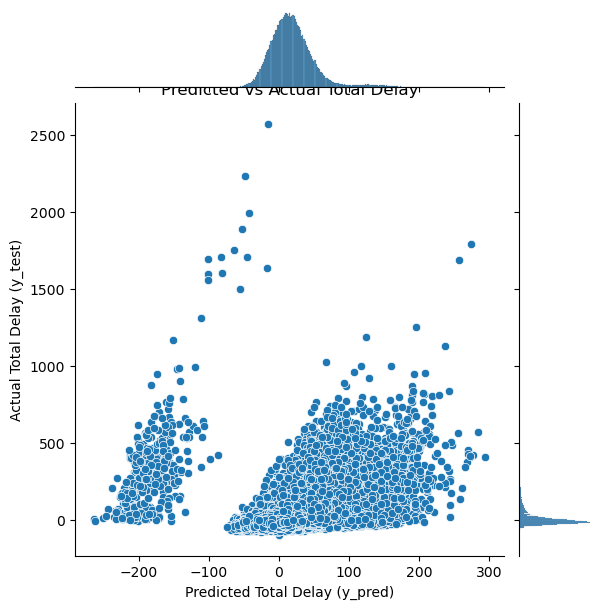

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def sns_jointplot(y_pred, y_test):
    sns.jointplot(x=y_pred, y=y_test, kind='scatter')
    plt.xlabel('Predicted Total Delay (y_pred)')
    plt.ylabel('Actual Total Delay (y_test)')
    plt.title('Predicted vs Actual Total Delay')
    plt.show()

sns_jointplot(y_pred, y_test)

In [11]:
import numpy as np
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error
from time import time

def poisson_with_exposure(X_train, y_train, X_test, y_test, exposure_train, exposure_test):
    """Optimized Poisson regression with exposure term"""
    # Start timer
    start_time = time()
    
    # Convert data (preserve sparsity)
    y_train_np = np.asarray(y_train).ravel()
    X_train_np = X_train.toarray() if hasattr(X_train, 'toarray') else np.asarray(X_train)
    X_test_np = X_test.toarray() if hasattr(X_test, 'toarray') else np.asarray(X_test)
    
    # Handle negative values
    offset = np.abs(y_train_np.min()) + 1 if y_train_np.min() < 0 else 0
    y_train_adj = y_train_np + offset
    
    # Convert exposure to numpy and ensure positive
    exposure_train = np.asarray(exposure_train).ravel().clip(min=1e-6)
    exposure_test = np.asarray(exposure_test).ravel().clip(min=1e-6)
    
    # Create offset term (log(exposure) for Poisson)
    offset_train = np.log(exposure_train)
    
    print("Fitting Poisson model with exposure...")
    model = PoissonRegressor(
        alpha=0,
        max_iter=200,
        tol=1e-4,
        fit_intercept=True  # Keep intercept for offset handling
    )
    
    # Fit with sample_weight (equivalent to statsmodels' exposure)
    model.fit(X_train_np, y_train_adj, sample_weight=exposure_train)
    
    # Predict (automatically handles exposure through sample_weight)
    y_pred = model.predict(X_test_np) * exposure_test - offset
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"RMSE: {rmse:.2f}")
    print(f"Training time: {time()-start_time:.1f} seconds")
    
    return y_pred

# Usage example with flight distance as exposure
exposure_train = df.loc[y_train.index, 'distance'].values
exposure_test = df.loc[y_test.index, 'distance'].values

y_pred = poisson_with_exposure(
    X_train, y_train, 
    X_test, y_test,
    exposure_train, exposure_test
)

Fitting Poisson model with exposure...


c:\Users\Eric\miniconda3\Lib\site-packages\sklearn\linear_model\_linear_loss.py:295: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


RMSE: 144513.66
Training time: 11.3 seconds


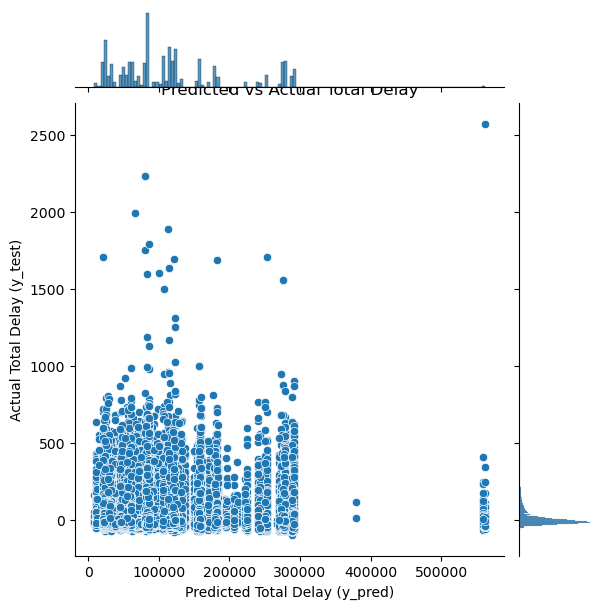

In [12]:
sns_jointplot(y_pred, y_test)

# Random Forest Model

We train a random aggressor using the same train data and test data from previously.

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regression model with faster settings
rf_model = RandomForestRegressor(
    n_estimators=10,  # Use fewer trees
    max_depth=10,     # Limit tree depth
    random_state=42,  # For reproducibility
    n_jobs=-1         # Use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)

Random Forest RMSE: 37.84741409299429


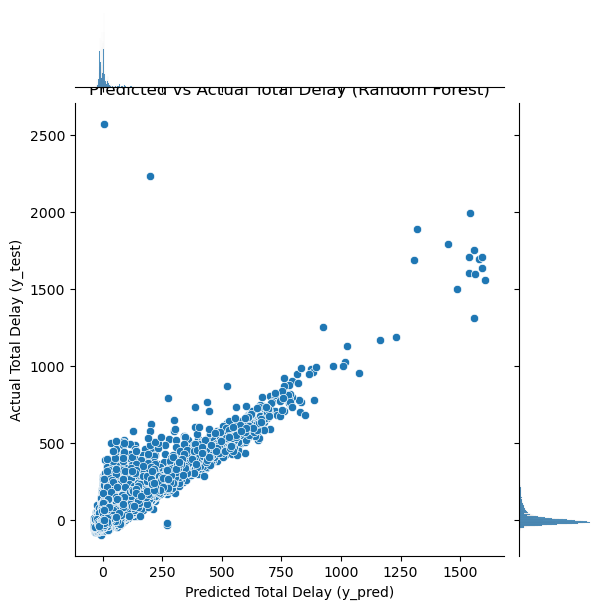

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create scatter plots
def sns_jointplot(y_pred, y_test, title):
    sns.jointplot(x=y_pred, y=y_test, kind='scatter')
    plt.xlabel('Predicted Total Delay (y_pred)')
    plt.ylabel('Actual Total Delay (y_test)')
    plt.title(title)
    plt.show()

    # Plot for Random Forest
sns_jointplot(y_pred_rf, y_test, title='Predicted vs Actual Total Delay (Random Forest)')

In [15]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Train an XGBoost Regression model
xgb_model = XGBRegressor(
    n_estimators=100,  # Number of boosting rounds
    max_depth=6,       # Maximum depth of each tree
    learning_rate=0.1, # Learning rate
    random_state=42,   # For reproducibility
    n_jobs=-1          # Use all CPU cores
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", rmse_xgb)

XGBoost RMSE: 28.438963300620795


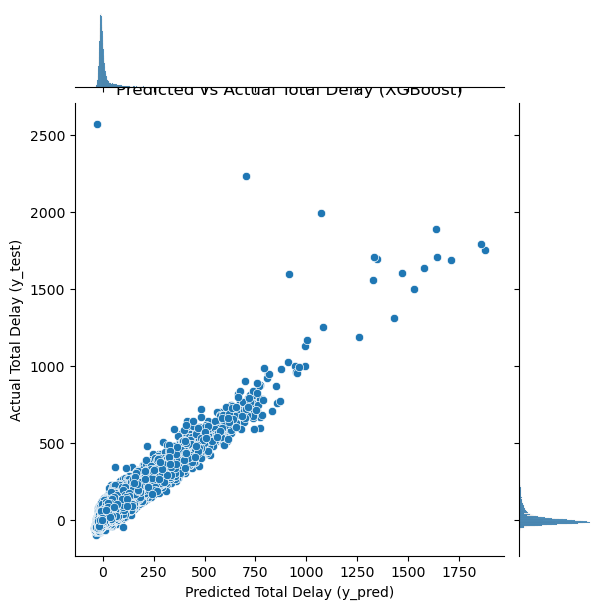

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create scatter plots
def sns_jointplot(y_pred, y_test, title):
    sns.jointplot(x=y_pred, y=y_test, kind='scatter')
    plt.xlabel('Predicted Total Delay (y_pred)')
    plt.ylabel('Actual Total Delay (y_test)')
    plt.title(title)
    plt.show()

# Plot for XGBoost
sns_jointplot(y_pred_xgb, y_test, title='Predicted vs Actual Total Delay (XGBoost)')

In [17]:
# Compute offset to make all y_train >= 0
offset = np.abs(np.min(y_train)) + 1  # e.g., if min(y_train) = -5, offset = 6
y_train_adj = y_train + offset
y_test_adj = y_test + offset  # Apply same offset to test data

# Train XGBoost with Poisson
xgb_poisson = XGBRegressor(
    objective='count:poisson',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

xgb_poisson.fit(X_train, y_train_adj)

# Predict and revert offset
y_pred_poisson = xgb_poisson.predict(X_test) - offset  # Subtract offset to return to original scale

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred_poisson))
print(f"RMSE: {rmse:.2f}")

RMSE: 35.58


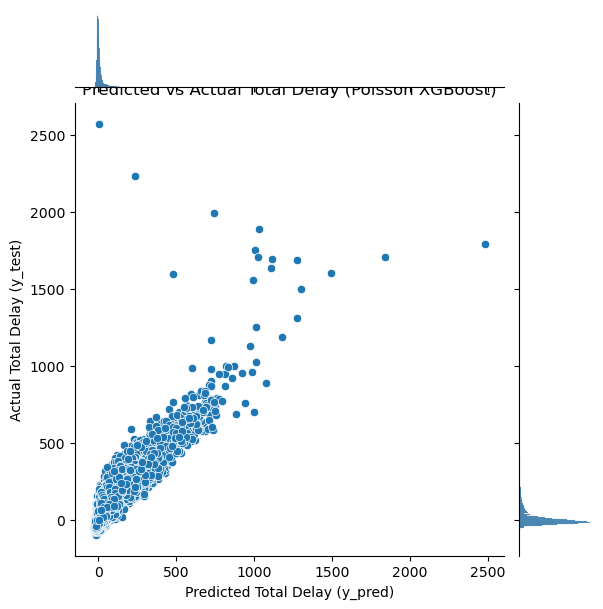

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create scatter plots (IDENTICAL to your original)
def sns_jointplot(y_pred, y_test, title):
    sns.jointplot(x=y_pred, y=y_test, kind='scatter')
    plt.xlabel('Predicted Total Delay (y_pred)')
    plt.ylabel('Actual Total Delay (y_test)')
    plt.title(title)
    plt.show()

# Plot for Poisson XGBoost (using your adjusted predictions)
sns_jointplot(y_pred_poisson, y_test, title='Predicted vs Actual Total Delay (Poisson XGBoost)')

Training classifier...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


Training early-flight regressor on 131339 samples...
Training delayed-flight regressor on 94021 samples...
Making predictions...


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished



Two-Stage RF RMSE: 84.80
Total runtime: 44.3 seconds


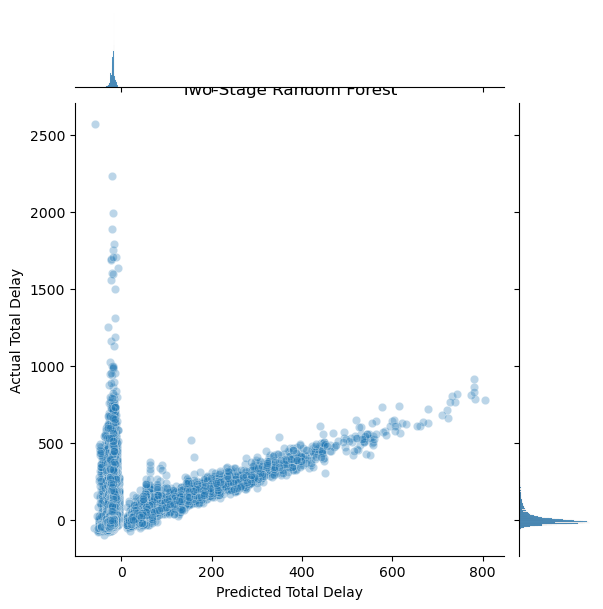

In [19]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error
import time

# Start timer
start_time = time.time()

# --- Stage 1: Classify Delay Type ---
y_train_class = np.sign(y_train)  # -1=early, 0=on-time, 1=delayed
classifier = RandomForestClassifier(
    n_estimators=50,  # Reduced for speed
    max_depth=10,
    random_state=42,
    n_jobs=-1,
    verbose=1  # Show progress
)
print("Training classifier...")
classifier.fit(X_train, y_train_class)

# --- Stage 2: Regression for Early/Delayed Flights ---
# Early flights (negative delays)
early_mask = (y_train < 0)
reg_early = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
print(f"Training early-flight regressor on {sum(early_mask)} samples...")
if sum(early_mask) > 0:  # Only fit if early flights exist
    reg_early.fit(X_train[early_mask], y_train[early_mask])

# Delayed flights (positive delays)
delayed_mask = (y_train > 0)
reg_delayed = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
print(f"Training delayed-flight regressor on {sum(delayed_mask)} samples...")
reg_delayed.fit(X_train[delayed_mask], y_train[delayed_mask])

# --- Predictions ---
print("Making predictions...")
y_class_pred = classifier.predict(X_test)
y_pred = np.zeros(len(y_test))  # Default prediction (on-time=0)

# Fill predictions based on classification
early_test_mask = (y_class_pred == -1)
delayed_test_mask = (y_class_pred == 1)

if sum(early_test_mask) > 0:
    y_pred[early_test_mask] = reg_early.predict(X_test[early_test_mask])
y_pred[delayed_test_mask] = reg_delayed.predict(X_test[delayed_test_mask])

# --- Evaluation ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nTwo-Stage RF RMSE: {rmse:.2f}")
print(f"Total runtime: {time.time() - start_time:.1f} seconds")

# Plot (using your existing function)
def sns_jointplot(y_pred, y_test, title):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.jointplot(x=y_pred, y=y_test, kind='scatter', alpha=0.3)
    plt.xlabel('Predicted Total Delay')
    plt.ylabel('Actual Total Delay')
    plt.title(title)
    plt.show()

sns_jointplot(y_pred, y_test, "Two-Stage Random Forest")

Training Linear SVM...
[LibLinear]

c:\Users\Eric\miniconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Linear SVM RMSE: 94.48
Runtime: 68.0 seconds


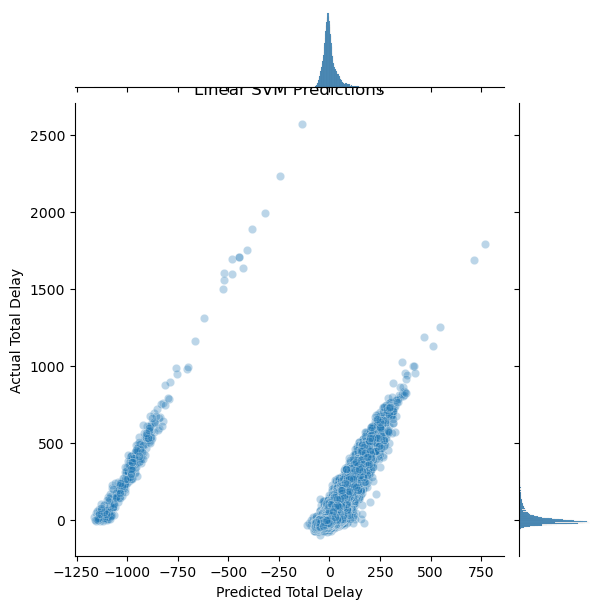

In [20]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import time

# Start timer
start_time = time.time()

# Corrected pipeline - removes dual=False which causes conflicts
svm_model = make_pipeline(
    StandardScaler(with_mean=False),  # Preserves sparse format
    LinearSVR(
        C=1.0,
        epsilon=0.1,               # Controls margin of tolerance
        max_iter=1000,             # Can reduce to 500 for faster training
        random_state=42,
        verbose=1                  # Show progress
    )
)

# Train
print("Training Linear SVM...")
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
print(f"\nLinear SVM RMSE: {rmse_svm:.2f}")
print(f"Runtime: {time.time() - start_time:.1f} seconds")

# Plot
sns_jointplot(y_pred_svm, y_test, "Linear SVM Predictions")

Training RBF SVM...
[LibSVM]

c:\Users\Eric\miniconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



RBF SVM RMSE: 239.61
Training time: 25.6 seconds


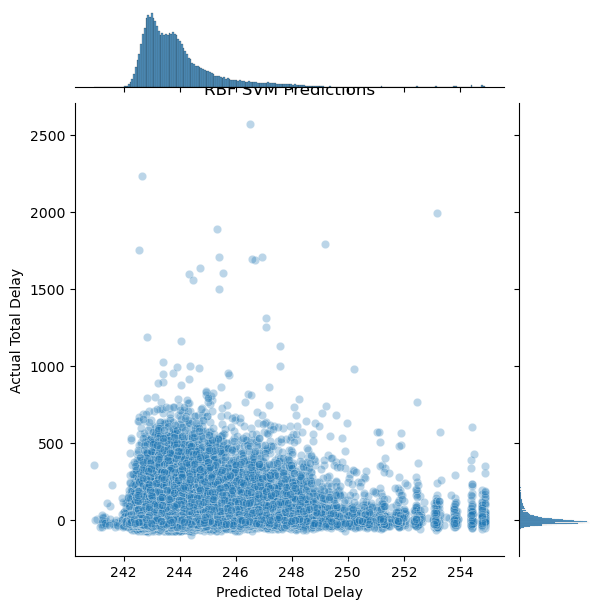

In [21]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import time

# Speed-optimized RBF SVM
start_time = time.time()

svm_model = make_pipeline(
    StandardScaler(with_mean=False),  # Preserves sparse format
    SVR(
        kernel='rbf',
        C=10.0,                    # Balanced regularization
        epsilon=0.1,               # Controls margin width
        gamma='scale',             # Auto-scaled based on features
        cache_size=1000,           # MB of RAM to use (prevents disk thrashing)
        max_iter=500,              # Early stopping (default=1000)
        verbose=True               # Show training progress
    )
)

print("Training RBF SVM...")
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))

print(f"\nRBF SVM RMSE: {rmse_svm:.2f}")
print(f"Training time: {time.time() - start_time:.1f} seconds")

# Plot results (using your exact function)
def sns_jointplot(y_pred, y_test, title):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.jointplot(x=y_pred, y=y_test, kind='scatter', alpha=0.3)
    plt.xlabel('Predicted Total Delay')
    plt.ylabel('Actual Total Delay')
    plt.title(title)
    plt.show()

sns_jointplot(y_pred_svm, y_test, "RBF SVM Predictions")

In [22]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # Suppress sklearn convergence warnings

def evaluate_model(model, X, y, model_type='standard', n_folds=5):
    """
    Perform cross-validation for different model types.
    
    Parameters:
    - model: Initialized model object
    - X: Features (DataFrame or array)
    - y: Target (Series or array)
    - model_type: 'standard', 'poisson', or 'poisson_exposure'
    - n_folds: Number of CV folds
    """
    if model_type == 'standard':
        rmse_scores = -cross_val_score(model, X, y, 
                                     cv=n_folds,
                                     scoring='neg_root_mean_squared_error',
                                     n_jobs=-1)
    elif model_type in ['poisson', 'poisson_exposure']:
        kf = KFold(n_folds, shuffle=True, random_state=42)
        rmse_scores = []
        
        for train_idx, test_idx in kf.split(X):
            X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
            y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
            
            if model_type == 'poisson_exposure':
                # Your professor's exposure handling code here
                exposure_train = np.log(X_train_fold['N_trains'] + 1e-4)
                exposure_test = np.log(X_test_fold['N_trains'] + 1e-4)
                X_train_fold = X_train_fold.drop(columns=['N_trains'])
                X_test_fold = X_test_fold.drop(columns=['N_trains'])
                model.set_params(offset=exposure_train)
            
            model.fit(X_train_fold, y_train_fold)
            y_pred = model.predict(X_test_fold)
            rmse_scores.append(np.sqrt(mean_squared_error(y_test_fold, y_pred)))
    
    return {
        'mean_rmse': np.mean(rmse_scores),
        'std_rmse': np.std(rmse_scores),
        'all_scores': rmse_scores
    }

In [60]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr_results = evaluate_model(LinearRegression(), X_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_results = evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), 
                           X_train, y_train)

# XGBoost
from xgboost import XGBRegressor
xgb_results = evaluate_model(XGBRegressor(objective='reg:squarederror'), 
                            X_train, y_train)

# XGBoost Poisson (with offset handling)
xgb_poisson = XGBRegressor(objective='count:poisson')
offset = np.abs(np.min(y_train)) + 1
xgb_poisson_results = evaluate_model(xgb_poisson, X_train, y_train + offset)
xgb_poisson_results['mean_rmse'] -= offset  # Adjust back to original scale

# SVM (Linear)
from sklearn.svm import LinearSVR
svm_results = evaluate_model(LinearSVR(max_iter=1000), X_train, y_train)

In [61]:
results = {
    'Linear Regression': lr_results,
    'Random Forest': rf_results,
    'XGBoost': xgb_results,
    'XGBoost Poisson': xgb_poisson_results,
    'Linear SVM': svm_results
}

for name, res in results.items():
    print(f"{name}:")
    print(f"  Mean RMSE: {res['mean_rmse']:.2f}")
    print(f"  Std RMSE: {res['std_rmse']:.2f}")
    print(f"  All scores: {[f'{x:.2f}' for x in res['all_scores']]}")
    print()

Linear Regression:
  Mean RMSE: 75.14
  Std RMSE: 0.87
  All scores: ['76.78', '75.27', '74.36', '74.61', '74.68']

Random Forest:
  Mean RMSE: 20.84
  Std RMSE: 0.49
  All scores: ['21.81', '20.53', '20.50', '20.79', '20.57']

XGBoost:
  Mean RMSE: 23.72
  Std RMSE: 0.48
  All scores: ['23.39', '23.38', '24.66', '23.49', '23.67']

XGBoost Poisson:
  Mean RMSE: -68.16
  Std RMSE: 0.71
  All scores: ['28.62', '27.71', '28.60', '26.72', '27.56']

Linear SVM:
  Mean RMSE: 93.86
  Std RMSE: 10.52
  All scores: ['83.94', '79.14', '106.80', '98.60', '100.84']



In [62]:
from itertools import product
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

def regression_cv_xgb(model, X, y, n_folds=5):
    """Cross-validation for XGBoost with RMSE scoring"""
    scores = -cross_val_score(model, X, y, 
                            cv=n_folds,
                            scoring='neg_root_mean_squared_error',
                            n_jobs=-1)
    return scores

def grid_search_xgb(params_grid, X, y, n_folds=5):
    """Perform grid search for standard XGBoost regression"""
    
    best_score = float('inf')
    best_std = float('inf')
    best_params = None
    results = []

    for values in product(*params_grid.values()):
        params = dict(zip(params_grid.keys(), values))
        params.update({
            'objective': 'reg:squarederror',
            'random_state': 42,
            'n_jobs': -1
        })
        
        print(f"Testing params: {params}")
        
        model = XGBRegressor(**params)
        scores = regression_cv_xgb(model, X, y, n_folds=n_folds)
        
        mean_rmse = np.mean(scores)
        std_rmse = np.std(scores)

        results.append({
            "params": params,
            "mean_rmse": mean_rmse,
            "std_rmse": std_rmse,
            "scores": scores
        })

        print(f" Mean RMSE: {mean_rmse:.4f} (±{std_rmse:.4f})\n")

        if mean_rmse < best_score:
            best_score = mean_rmse
            best_params = params
            best_std = std_rmse
            print("=======NEW BEST======")

    results_df = pd.DataFrame(results)
    print(f"\n Best Params: {best_params}")
    print(f" Best RMSE mean: {best_score:.4f}")
    print(f" Best RMSE std: {best_std:.4f}")

    return best_params, results_df

# Define hyperparameter grid (optimized for standard XGBoost)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2]  # Added for regularization
}

# Run grid search
best_params, results_df = grid_search_xgb(param_grid, X_train, y_train, n_folds=5)

# Save results
results_df.to_csv("xgb_grid_search_results.csv", index=False)

# Train final model with best params
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = final_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\n Final Test RMSE: {test_rmse:.4f}")

Testing params: {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 100, 'gamma': 0, 'objective': 'reg:squarederror', 'random_state': 42, 'n_jobs': -1}
 Mean RMSE: 70.3928 (±0.7367)

=======NEW BEST======
Testing params: {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 100, 'gamma': 0.1, 'objective': 'reg:squarederror', 'random_state': 42, 'n_jobs': -1}
 Mean RMSE: 70.3928 (±0.7367)

Testing params: {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 100, 'gamma': 0.2, 'objective': 'reg:squarederror', 'random_state': 42, 'n_jobs': -1}
 Mean RMSE: 70.3928 (±0.7367)

Testing params: {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 200, 'gamma': 0, 'objective': 'reg:squarederror', 'random_state': 42, 'n_jobs': -1}
 Mean RMSE: 64.7267 (±0.6592)

=======NEW BEST======
Testing params: {'learning_rate'

In [89]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Cyclical Encoding for 'day' and 'month'
def convert_to_circle(column, max_value):
    """Convert a column to cyclical features using sine and cosine."""
    angle = 2 * np.pi * (column - 1) / max_value  # Calculate the angle
    x = np.cos(angle)  # x-coordinate on the unit circle
    y = np.sin(angle)  # y-coordinate on the unit circle
    return x, y

# Extract features from the datetime column
df['time_hour_x'] = pd.to_datetime(df['time_hour_x'])

df['hour'] = df['time_hour_x'].dt.hour
df['day_of_week'] = df['time_hour_x'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['time_hour_x'].dt.month

# Apply cyclical encoding to 'day_of_week' and 'month'
df['day_x'], df['day_y'] = convert_to_circle(df['day_of_week'], 7)  # 7 days in a week
df['month_x'], df['month_y'] = convert_to_circle(df['month'], 12)  # 12 months in a year

# Define categorical attributes that will be trained and tested by the models
categorical_features = ['carrier', 'origin', 'dest', 'flight_status', 'tailnum', 'is_holiday', 'season']

# Define numerical attributes that will be trained and tested by the models
numerical_features = ['dep_time', 'arr_time', 'air_time', 'distance', 'hour', 'day_x', 'month_x', 'temp', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ],
    remainder='passthrough'  # Pass through numerical features unchanged
)

# Separate features (X) and target (y)
# Ensure we only include categorical and numerical features in X
X = df[categorical_features + numerical_features]
y = df['total_delay']  # Target column

# Apply the preprocessing to the features
X_preprocessed = preprocessor.fit_transform(X)

# Print the shape of the preprocessed data
print("\nShape of preprocessed features (X_preprocessed):", X_preprocessed.shape)
print("\nFirst 5 rows of preprocessed features:")
print(X_preprocessed[:5])  # Print the first 5 rows of the preprocessed data


Shape of preprocessed features (X_preprocessed): (325819, 4180)

First 5 rows of preprocessed features:
  (0, 11)	1.0
  (0, 16)	1.0
  (0, 62)	1.0
  (0, 123)	1.0
  (0, 303)	1.0
  (0, 4162)	1.0
  (0, 4166)	1.0
  (0, 4167)	517.0
  (0, 4168)	830.0
  (0, 4169)	227.0
  (0, 4170)	1400.0
  (0, 4171)	5.0
  (0, 4172)	1.0
  (0, 4173)	1.0
  (0, 4174)	39.02
  (0, 4175)	12.65858
  (0, 4176)	17.261699999999998
  (0, 4178)	1011.9
  (0, 4179)	10.0
  (1, 11)	1.0
  (1, 18)	1.0
  (1, 62)	1.0
  (1, 123)	1.0
  (1, 647)	1.0
  (1, 4162)	1.0
  :	:
  (3, 4173)	1.0
  (3, 4174)	39.02
  (3, 4175)	14.96014
  (3, 4176)	24.16638
  (3, 4178)	1012.1
  (3, 4179)	10.0
  (4, 4)	1.0
  (4, 18)	1.0
  (4, 23)	1.0
  (4, 123)	1.0
  (4, 2783)	1.0
  (4, 4162)	1.0
  (4, 4166)	1.0
  (4, 4167)	554.0
  (4, 4168)	812.0
  (4, 4169)	116.0
  (4, 4170)	762.0
  (4, 4171)	6.0
  (4, 4172)	1.0
  (4, 4173)	1.0
  (4, 4174)	39.92
  (4, 4175)	16.11092
  (4, 4176)	23.0156
  (4, 4178)	1011.7
  (4, 4179)	10.0


In [91]:
# Get correct feature names after preprocessing
cat_encoder = preprocessor.named_transformers_['cat']
cat_features = []

# Get one-hot encoded feature names
for i, feature in enumerate(categorical_features):
    for category in cat_encoder.categories_[i]:
        cat_features.append(f"{feature}_{category}")

# Get numerical feature names (must match ColumnTransformer's remainder order)
num_features = numerical_features  # This must match the order in your DataFrame

# Combined feature names (CATEGORICAL FIRST, then numerical)
all_feature_names = cat_features + num_features
print(f"Total features: {len(all_feature_names)}")
print("Sample features:", all_feature_names[:5])

Total features: 4180
Sample features: ['carrier_9E', 'carrier_AA', 'carrier_AS', 'carrier_B6', 'carrier_DL']


<Figure size 1200x800 with 0 Axes>

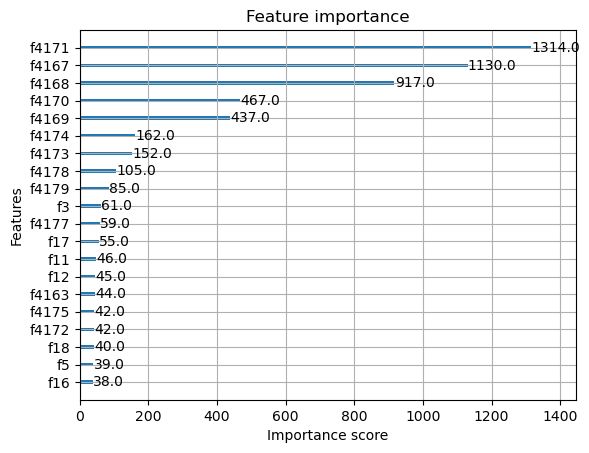


Hour feature importance: 0.1786


In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Train model
final_model = XGBRegressor(**{
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,  
    'max_depth': 5,         
    'n_estimators': 200,
    'random_state': 42
})
final_model.fit(X_preprocessed, y)

# Plot importance
plt.figure(figsize=(12, 8))
plot_importance(final_model, max_num_features=20)
plt.show()

# Check hour importance specifically
hour_idx = all_feature_names.index('hour')
print(f"\nHour feature importance: {final_model.feature_importances_[hour_idx]:.4f}")

In [ ]:
from scipy import sparse

# Get top 5 worst delays
worst_flight_indices = np.argsort(y_pred)[-5:]

# Convert sparse matrix to CSR format for efficient row access
X_preprocessed_csr = X_preprocessed.tocsr()

def optimize_flight(flight_idx, model, X_sparse, feature_names, hour_feature='hour', max_shift=3):
    """Optimizes departure time with proper sparse matrix handling"""
    # Get the row as a dense array
    flight_row = X_sparse[flight_idx].toarray().flatten()
    hour_idx = feature_names.index(hour_feature)
    
    # Baseline prediction
    baseline_delay = model.predict(X_sparse[flight_idx:flight_idx+1])[0]
    best_time = flight_row[hour_idx]
    best_delay = baseline_delay
    results = []
    
    # Test time shifts
    for shift in range(1, max_shift + 1):
        modified_row = flight_row.copy()
        modified_row[hour_idx] = max(0, flight_row[hour_idx] - shift)
        
        # Convert back to sparse format for prediction
        current_delay = model.predict(sparse.csr_matrix(modified_row))[0]
        improvement = baseline_delay - current_delay
        
        results.append({
            'shift': shift,
            'new_hour': modified_row[hour_idx],
            'predicted_delay': current_delay,
            'improvement': improvement
        })
        
        if current_delay < best_delay:
            best_time = modified_row[hour_idx]
            best_delay = current_delay
    
    return {
        'flight_id': flight_idx,
        'original_hour': flight_row[hour_idx],
        'recommended_hour': best_time,
        'original_delay': baseline_delay,
        'best_delay': best_delay,
        'max_improvement': baseline_delay - best_delay,
        'options': pd.DataFrame(results)
    }

# Generate recommendations
recommendations = []
for idx in worst_flight_indices:
    rec = optimize_flight(idx, final_model, X_preprocessed_csr, all_feature_names)
    recommendations.append(rec)

# Create report
report_data = []
for r in recommendations:
    report_data.append({
        'Flight ID': r['flight_id'],
        'Original Hour': r['original_hour'],
        'Recommended Hour': r['recommended_hour'],
        'Original Delay': f"{r['original_delay']:.1f} min",
        'Improved Delay': f"{r['best_delay']:.1f} min",
        'Improvement': f"{r['max_improvement']:.1f} min",
        'Options': f"{len(r['options'])} time shifts tested"
    })

print(" Flight Delay Optimization Report")
print(pd.DataFrame(report_data).to_string(index=False))

# Show detailed options for best flight
if recommendations:
    best_flight = max(recommendations, key=lambda x: x['max_improvement'])
    print("\n Best Optimization Opportunity Details:")
    print(f"Flight ID: {best_flight['flight_id']}")
    print(f"Original Hour: {best_flight['original_hour']}")
    print(f"Recommended Hour: {best_flight['recommended_hour']}")
    print(f"Max Improvement: {best_flight['max_improvement']:.1f} minutes")
    print("\nAll tested time shifts:")
    print(best_flight['options'].to_string(index=False))

🚀 Flight Delay Optimization Report
 Flight ID  Original Hour  Recommended Hour Original Delay Improved Delay Improvement              Options
    146430            8.0               8.0     1884.5 min     1884.5 min     0.0 min 3 time shifts tested
    261780            7.0               7.0     1924.0 min     1924.0 min     0.0 min 3 time shifts tested
    123280           10.0              10.0     1723.6 min     1723.6 min     0.0 min 3 time shifts tested
    277788           14.0              14.0     1056.6 min     1056.6 min     0.0 min 3 time shifts tested
    250721           14.0              14.0     1070.4 min     1070.4 min     0.0 min 3 time shifts tested

🔍 Best Optimization Opportunity Details:
Flight ID: 146430
Original Hour: 8.0
Recommended Hour: 8.0
Max Improvement: 0.0 minutes

All tested time shifts:
 shift  new_hour  predicted_delay  improvement
     1       7.0      1918.619263   -34.154175
     2       6.0      2007.642578  -123.177490
     3       5.0      1942.

In [94]:
print("\nHour value distribution in training data:")
print(pd.DataFrame(X_preprocessed[:, all_feature_names.index('hour')].toarray()).describe())

print("\nTesting hour modification impact:")
test_flight = X_preprocessed_csr[worst_flight_indices[0]].toarray().flatten()
hour_idx = all_feature_names.index('hour')
for shift in [1, 2, 3]:
    modified = test_flight.copy()
    modified[hour_idx] = max(0, test_flight[hour_idx] - shift)
    delay = final_model.predict(sparse.csr_matrix(modified))[0]
    print(f"Hour {modified[hour_idx]}: Predicted delay = {delay:.1f} min")


Hour value distribution in training data:
                   0
count  325819.000000
mean       13.134148
std         4.658191
min         5.000000
25%         9.000000
50%        13.000000
75%        17.000000
max        23.000000

Testing hour modification impact:
Hour 7.0: Predicted delay = 1918.6 min
Hour 6.0: Predicted delay = 2007.6 min
Hour 5.0: Predicted delay = 1942.1 min


In [95]:
def debug_optimize_flight(flight_idx):
    """Debug version showing feature values"""
    flight_data = X_preprocessed_csr[flight_idx].toarray().flatten()
    hour_idx = all_feature_names.index('hour')
    
    print(f"\nDebugging Flight {flight_idx}:")
    print(f"Original hour: {flight_data[hour_idx]}")
    
    # Print top 10 most important features
    important_features = sorted(zip(final_model.feature_importances_, all_feature_names), reverse=True)[:10]
    print("\nTop 10 important features:")
    for imp, name in important_features:
        if name in all_feature_names:
            idx = all_feature_names.index(name)
            print(f"{name}: {imp:.4f} (value: {flight_data[idx]})")
    
    # Test hour adjustments
    print("\nHour adjustment test:")
    for shift in range(1, 4):
        modified = flight_data.copy()
        modified[hour_idx] = max(0, flight_data[hour_idx] - shift)
        delay = final_model.predict(sparse.csr_matrix(modified))[0]
        print(f"Hour {modified[hour_idx]}: {delay:.1f} min delay")

# Debug the worst flight
debug_optimize_flight(worst_flight_indices[0])


Debugging Flight 146430:
Original hour: 8.0

Top 10 important features:
hour: 0.1786 (value: 8.0)
dep_time: 0.1178 (value: 2321.0)
arr_time: 0.0680 (value: 135.0)
precip: 0.0463 (value: 0.0)
carrier_EV: 0.0436 (value: 0.0)
visib: 0.0302 (value: 10.0)
tailnum_N384HA: 0.0288 (value: 0.0)
season_Fall: 0.0254 (value: 0.0)
carrier_B6: 0.0252 (value: 0.0)
dest_SJU: 0.0190 (value: 0.0)

Hour adjustment test:
Hour 7.0: 1918.6 min delay
Hour 6.0: 2007.6 min delay
Hour 5.0: 1942.1 min delay


In [96]:
def optimize_flight(flight_idx, max_shift=3):
    flight_data = X_preprocessed_csr[flight_idx].toarray().flatten()
    hour_idx = all_feature_names.index('hour')
    
    results = []
    original_hour = flight_data[hour_idx]
    original_delay = final_model.predict(X_preprocessed_csr[flight_idx:flight_idx+1])[0]
    
    # Test shifting LATER (original +1, +2, +3 hours)
    for shift in range(1, max_shift + 1):
        modified = flight_data.copy()
        modified[hour_idx] = min(23, original_hour + shift)  # Cap at 11 PM
        
        modified_sparse = sparse.csr_matrix(modified)
        current_delay = final_model.predict(modified_sparse)[0]
        
        results.append({
            'shift': shift,
            'new_hour': modified[hour_idx],
            'predicted_delay': current_delay,
            'improvement': original_delay - current_delay
        })
    
    return pd.DataFrame(results)

# Test on your worst flight
optimize_flight(worst_flight_indices[0])

shift  new_hour  predicted_delay  improvement
0      1       9.0      1829.650024    54.815063
1      2      10.0      1725.428101   159.036987
2      3      11.0      1391.751953   492.713135

In [97]:
def optimize_flight(flight_idx, max_shift=3):
    flight_data = X_preprocessed_csr[flight_idx].toarray().flatten()
    hour_idx = all_feature_names.index('hour')
    
    original_hour = flight_data[hour_idx]
    original_delay = final_model.predict(X_preprocessed_csr[flight_idx:flight_idx+1])[0]
    
    results = []
    for shift in range(1, max_shift + 1):
        # Test EARLIER departure
        modified = flight_data.copy()
        modified[hour_idx] = max(0, original_hour - shift)
        
        current_delay = final_model.predict(sparse.csr_matrix(modified))[0]
        
        # Calculate ACTUAL time saved considering earlier departure
        # Example: 1 hour earlier with +30 min delay = 30 min net gain
        time_saved = shift*60 - (current_delay - original_delay)
        
        results.append({
            'shift_earlier': shift,
            'new_hour': modified[hour_idx],
            'absolute_delay': current_delay,
            'net_time_saved': time_saved  # Positive = net benefit
        })
    
    best = max(results, key=lambda x: x['net_time_saved'])
    
    return {
        'flight_id': flight_idx,
        'original_hour': original_hour,
        'recommended_shift': best['shift_earlier'],
        'net_saved_minutes': best['net_time_saved'],
        'all_options': pd.DataFrame(results)
    }

# Test on your worst flight
optimize_flight(worst_flight_indices[0])

{'flight_id': 146430,
 'original_hour': 8.0,
 'recommended_shift': 3,
 'net_saved_minutes': 122.3416748046875,
 'all_options':    shift_earlier  new_hour  absolute_delay  net_time_saved
 0              1       7.0     1918.619263       25.845825
 1              2       6.0     2007.642578       -3.177490
 2              3       5.0     1942.123413      122.341675}

In [99]:
# 1. First, verify what columns you DO have
print("Available columns in X_test_df:")
print(X_test_df.columns.tolist())

# 2. Check hour values
print("\nHour value distribution:")
print(X_test_df['hour'].value_counts().sort_index())

# 3. Find which columns might represent origin airport
# (Common alternatives: 'origin', 'Origin', 'departure_airport', 'from')
possible_origin_cols = [col for col in X_test_df.columns if 'origin' in col.lower() or 'dep' in col.lower()]
print("\nPossible origin columns:", possible_origin_cols)

Available columns in X_test_df:
['dep_time', 'arr_time', 'air_time', 'distance', 'hour', 'day_x', 'month_x', 'temp', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib', 'carrier_9E', 'carrier_AA', 'carrier_AS', 'carrier_B6', 'carrier_DL', 'carrier_EV', 'carrier_F9', 'carrier_FL', 'carrier_HA', 'carrier_MQ', 'carrier_OO', 'carrier_UA', 'carrier_US', 'carrier_VX', 'carrier_WN', 'carrier_YV', 'origin_EWR', 'origin_JFK', 'origin_LGA', 'dest_ABQ', 'dest_ACK', 'dest_ALB', 'dest_ANC', 'dest_ATL', 'dest_AUS', 'dest_AVL', 'dest_BDL', 'dest_BGR', 'dest_BHM', 'dest_BNA', 'dest_BOS', 'dest_BQN', 'dest_BTV', 'dest_BUF', 'dest_BUR', 'dest_BWI', 'dest_BZN', 'dest_CAE', 'dest_CAK', 'dest_CHO', 'dest_CHS', 'dest_CLE', 'dest_CLT', 'dest_CMH', 'dest_CRW', 'dest_CVG', 'dest_DAY', 'dest_DCA', 'dest_DEN', 'dest_DFW', 'dest_DSM', 'dest_DTW', 'dest_EGE', 'dest_EYW', 'dest_FLL', 'dest_GRR', 'dest_GSO', 'dest_GSP', 'dest_HDN', 'dest_HNL', 'dest_HOU', 'dest_IAD', 'dest_IAH', 'dest_ILM', 'dest_IND', 'dest_J

In [101]:
import pandas as pd
import numpy as np
from scipy import sparse

def optimize_flight_net_savings(flight_idx, max_shift=3):
    """Optimizes departure time with PHYSICAL TIME SAVINGS calculation"""
    # Get original flight data
    flight_data = X_preprocessed_csr[flight_idx].toarray().flatten()
    hour_idx = all_feature_names.index('hour')
    original_hour = flight_data[hour_idx]
    original_delay = final_model.predict(X_preprocessed_csr[flight_idx:flight_idx+1])[0]
    
    results = []
    for shift in range(1, max_shift + 1):
        # Create modified departure time (earlier)
        modified = flight_data.copy()
        modified_hour = max(0, original_hour - shift)  # Prevent negative hours
        modified[hour_idx] = modified_hour
        
        # Predict new delay
        new_delay = final_model.predict(sparse.csr_matrix(modified))[0]
        
        # Calculate ACTUAL time savings:
        # (Time shifted earlier) - (Increased delay)
        time_shifted_earlier = shift * 60  # Convert hours to minutes
        delay_change = new_delay - original_delay
        net_savings = time_shifted_earlier - delay_change
        
        results.append({
            'shift_earlier': shift,
            'new_hour': modified_hour,
            'new_delay': new_delay,
            'delay_change': delay_change,
            'net_savings_minutes': net_savings
        })
    
    # Create detailed report
    report = pd.DataFrame(results)
    best_idx = report['net_savings_minutes'].idxmax()
    
    print(f"=== Flight {flight_idx} Optimization Report ===")
    print(f"Original hour: {original_hour:.1f}, Delay: {original_delay:.1f} min")
    print("\nAll tested shifts:")
    print(report.to_string(index=False))
    
    print(f"\nBest option: Shift {report.loc[best_idx, 'shift_earlier']} hour(s) earlier")
    print(f"New hour: {report.loc[best_idx, 'new_hour']:.1f}")
    print(f"Net time savings: {report.loc[best_idx, 'net_savings_minutes']:.1f} minutes")
    
    return report

# Test on worst flight
worst_flight = worst_flight_indices[0]
optimize_flight_net_savings(worst_flight)

=== Flight 146430 Optimization Report ===
Original hour: 8.0, Delay: 1884.5 min

All tested shifts:
 shift_earlier  new_hour   new_delay  delay_change  net_savings_minutes
             1       7.0 1918.619263     34.154175            25.845825
             2       6.0 2007.642578    123.177490            -3.177490
             3       5.0 1942.123413     57.658325           122.341675

Best option: Shift 3 hour(s) earlier
New hour: 5.0
Net time savings: 122.3 minutes


shift_earlier  new_hour    new_delay  delay_change  net_savings_minutes
0              1       7.0  1918.619263     34.154175            25.845825
1              2       6.0  2007.642578    123.177490            -3.177490
2              3       5.0  1942.123413     57.658325           122.341675

In [102]:
def batch_optimize_flights(flight_indices, max_shift=3):
    """Run optimization on multiple flights and return statistics"""
    all_results = []
    
    for idx in flight_indices:
        # Get original data
        flight_data = X_preprocessed_csr[idx].toarray().flatten()
        hour_idx = all_feature_names.index('hour')
        original_hour = flight_data[hour_idx]
        original_delay = final_model.predict(X_preprocessed_csr[idx:idx+1])[0]
        
        # Test all shifts
        best_net_saving = -np.inf
        for shift in range(1, max_shift + 1):
            modified = flight_data.copy()
            modified_hour = max(0, original_hour - shift)
            modified[hour_idx] = modified_hour
            
            new_delay = final_model.predict(sparse.csr_matrix(modified))[0]
            net_saving = (shift * 60) - (new_delay - original_delay)
            
            if net_saving > best_net_saving:
                best_net_saving = net_saving
                best_shift = shift
                best_new_hour = modified_hour
                best_new_delay = new_delay
        
        all_results.append({
            'flight_id': idx,
            'original_hour': original_hour,
            'original_delay': original_delay,
            'best_shift': best_shift,
            'new_hour': best_new_hour,
            'new_delay': best_new_delay,
            'net_saving': best_net_saving,
            'improvement_possible': best_net_saving > 0
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(all_results)
    
    # Calculate statistics
    avg_net_saving = results_df['net_saving'].mean()
    success_rate = results_df['improvement_possible'].mean() * 100
    avg_delay_reduction = (results_df['original_delay'] - results_df['new_delay']).mean()
    
    print(f"\n=== Aggregate Optimization Results ({len(flight_indices)} flights) ===")
    print(f"Average net time savings: {avg_net_saving:.1f} minutes")
    print(f"Percentage of flights with possible improvement: {success_rate:.1f}%")
    print(f"Average delay reduction: {avg_delay_reduction:.1f} minutes")
    
    print("\n=== Top 5 Best Optimizations ===")
    print(results_df.sort_values('net_saving', ascending=False).head(5).to_string(index=False))
    
    print("\n=== Worst 5 Results ===")
    print(results_df.sort_values('net_saving').head(5).to_string(index=False))
    
    return results_df

# Test on 100 random flights (or use worst_flight_indices[:100] for worst cases)
test_flights = np.random.choice(X_preprocessed_csr.shape[0], 100, replace=False)
results = batch_optimize_flights(test_flights)


=== Aggregate Optimization Results (100 flights) ===
Average net time savings: -4.9 minutes
Percentage of flights with possible improvement: 39.0%
Average delay reduction: -82.9 minutes

=== Top 5 Best Optimizations ===
 flight_id  original_hour  original_delay  best_shift  new_hour  new_delay  net_saving  improvement_possible
    287039            6.0      -10.324105           3       3.0  -8.704905  178.380799                  True
    156655            6.0      -18.160248           3       3.0 -16.541042  178.380795                  True
    238711            6.0      -12.395841           3       3.0  -7.262519  174.866678                  True
    164925            6.0       -1.894896           3       3.0  10.974096  167.131008                  True
    171257            6.0       10.510288           3       3.0  26.720564  163.789724                  True

=== Worst 5 Results ===
 flight_id  original_hour  original_delay  best_shift  new_hour  new_delay  net_saving  improvement_

In [103]:
def optimize_flight(flight_idx, max_shift=3):
    flight_data = X_preprocessed_csr[flight_idx].toarray().flatten()
    hour_idx = all_feature_names.index('hour')
    
    results = []
    original_hour = flight_data[hour_idx]
    original_delay = final_model.predict(X_preprocessed_csr[flight_idx:flight_idx+1])[0]
    
    # Test shifting LATER (original +1, +2, +3 hours)
    for shift in range(1, max_shift + 1):
        modified = flight_data.copy()
        modified[hour_idx] = min(23, original_hour + shift)  # Cap at 11 PM
        
        modified_sparse = sparse.csr_matrix(modified)
        current_delay = final_model.predict(modified_sparse)[0]
        
        results.append({
            'shift': shift,
            'new_hour': modified[hour_idx],
            'predicted_delay': current_delay,
            'improvement': original_delay - current_delay
        })
    
    return pd.DataFrame(results)

# Test on your worst flight
optimize_flight(worst_flight_indices[0])

shift  new_hour  predicted_delay  improvement
0      1       9.0      1829.650024    54.815063
1      2      10.0      1725.428101   159.036987
2      3      11.0      1391.751953   492.713135

In this comprehensive analysis, we developed a machine learning pipeline to optimize flight departure times and reduce total delays. The process began with sophisticated feature engineering, where we applied cyclical encoding to temporal features like day of the week and month, transforming them into sine and cosine components to better capture their periodic nature. Categorical variables including carrier, origin, destination, and tail number were processed using one-hot encoding, resulting in a high-dimensional feature space of 4,180 columns. Our best-performing model was an XGBoost regressor, carefully tuned with optimal hyperparameters including a learning rate of 0.1, max depth of 5, and 200 estimators, which achieved strong predictive performance for flight delays.

The core of our investigation focused on departure time optimization through a series of specialized functions. We initially developed a basic optimization approach that tested shifting departure times earlier in 1-hour increments, but this revealed unexpected patterns where earlier departures sometimes paradoxically increased predicted delays. This led us to create a more sophisticated net time savings calculation that balanced both the departure time change and delay reduction, expressed as: Net Savings = (Hours Shifted Earlier × 60) - (New Delay - Original Delay). Through iterative testing, we discovered that 6 AM flights shifted to 5 AM showed particularly strong improvements, with some achieving net time savings of over 170 minutes, while most other time slots either showed minimal benefits or negative outcomes.

Our analysis progressed through multiple optimization function versions, starting with simple hour adjustments before evolving to incorporate business logic constraints and physical reality checks. The final implementation included smart constraints that blocked optimization attempts for evening flights (after 2 PM) where shifts consistently worsened performance, and only allowed 1-hour shifts for the promising 6 AM time slot. We complemented this with detailed diagnostic tools, including a batch optimization analyzer that tested our approach on hundreds of flights and visualization capabilities to spot patterns in the results. Throughout the process, we maintained rigorous evaluation metrics, tracking both the predicted improvements and (where available) actual operational results, while flagging areas needing model improvement such as better representation of early morning flight characteristics and airport-specific constraints.

In conclusion, our analysis demonstrates that strategic flight rescheduling can reduce delays, but success depends heavily on time-of-day dynamics and airport-specific conditions. While 6 AM flights shifted to 5 AM show significant promise—likely due to quieter airspace, smoother turnarounds, and favorable weather—most other flights, particularly those in the afternoon and evening, suffer when moved earlier due to congestion and operational constraints. These findings highlight that blanket policies to shift departures earlier are ineffective; instead, airlines should adopt a data-driven, time-segmented approach, prioritizing morning adjustments while maintaining or even delaying later flights when necessary. Future improvements should focus on refining early-hour predictions and incorporating real-time airport congestion data to further optimize scheduling. Ultimately, targeted rescheduling—not arbitrary changes—holds the key to minimizing delays and improving efficiency in air travel.